# Modelo Prevision Ventas Productos Financieros ---  Memoria

## Tabla de Contenidos

- __1. INTRODUCCION__									
    - Motivación
    - Prologo
    - Objetivos
    - Finalidad
    - Interés
    
    
- __2. ESTADO DEL ARTE__
    - Marco
    - Seguros en España- Cifras
    - Tipos de seguros contratados en España. Evolución anual
    - Tipos de servicio del seguro en España
    - Nivel de contratación de seguros por edades
    - Contratación de seguros por ingresos del hogar 
    - Niveles de contratación del seguro de hogar en Europa
    - Conclusiones

    
      
- __3. CASO DE USO__  
    - Planteamiento
    - Importancia del modelo a resolver
    - Datos 
    - Variables utilizadas
    - Modelos 
    
 
- __4. DESARROLLO Y CONSTRUCCION DEL MODELO__
    - Información del Repositorio
    - Requisitos técnicos
    - Carga de la Base de Datos
    - Información y extracción de la base de datos
    - Objetivo
    - Limpieza y Unión 
    - EDA Análisis Exploratorio
    - Importancia de las variables
    - Preprocesado
    - Construcción del modelo
    
    
- __5. CONCLUSIONES__



In [2]:
from IPython.display import Image

In [4]:
# CAMBIAR SEGUN RUTA LOCAL HASTA UBICACION DEL REPOSITORIO
ruta = '/Users/manue/TFM'

## __1. Introduccion__


### __1.1 Motivacion Personal.__

<p style='text-align: justify;'> Desde 1998 hasta la actualidad, he desarrollado mi vida profesional en una entidad financiera, principalmente en Banca de particulares. Durante estos 23 años he pasado por todas las categorías laborales posibles dentro de una oficina comercial abierta al consumidor.  Desde comercial de caja y de mesa,  a subdirector y director de oficina. 
<p style='text-align: justify;'>En 2018, motivado por la búsqueda de nuevas habilidades, reciclaje laboral y personal, la adaptación a la nueva realidad de transformación digital y la necesidad de construir un plan alternativo debido a las inciertas perspectivas laborales,  huyendo de mi zona de confort decido cursar un Master en Bussines Analytics con la intención de aprender nuevas formas de análisis de negocio y poder ponerlas en práctica.  
<p style='text-align: justify;'>Durante el curso me doy cuenta que aun sin ninguna base de programación o informática, estadística o matemáticas, procediendo de una licenciatura de letras, había encontrado una motivación, una nueva parcela de estudio y un nuevo reto. 
<p style='text-align: justify;'>Decido continuar la formación con el Master en Data Science de K-School, recomendado por un antiguo profesor y siempre avisado de la dificultad técnica del mismo.  El resultado lo puedo definir en una frase.  Intenso pero entusiasmado y con ganas de continuar mi formación.</p>



### __1.2 Prologo.__

<p style='text-align: justify;'> Los bancos son entidades importantes.  Canalizan la riqueza entre los distintos actores de la sociedad.   Ese ha sido siempre su principal objetivo y razón de ser.  Captar recursos de aquellos que los tienen, remunerarles por esa captación y posteriormente prestarlos recibiendo a cambio un tipo de interés.  
<p style='text-align: justify;'>Se trata de una transacción sencilla y fácil.  Las entidades financieras pagan por captar y cobran por prestar.  De esta forma todas las partes salen beneficiadas.  Quien pone a disposición del banco un dinero que no necesita cobra intereses,  el banco cobra intereses al prestarlo y aquellos que reciben el préstamo pueden destinar el dinero para aquello que necesitan.  Una empresa,  una compra de un vehículo…la compra de una casa… etc.  
<p style='text-align: justify;'>Resumiendo, el negocio tradicional de las entidades financieras ha sido prestar a más tipo de interés el dinero que ha captado.   
<p style='text-align: justify;'>Hasta 2008 vivimos en un gran periodo de crecimiento económico bruscamente parado por la crisis de las hipotecas subprime.  Se inicio un largo periodo de 6 años de crisis profunda y recesión en la que los principales indicadores económicos de la sociedad sufrieron importantes caídas.  Las entidades financieras no fueron ajenas a este sufrimiento viendo sus cuentas de resultados mermadas.   El negocio tradicional bancario se había paralizado ,se había acabado.</p>


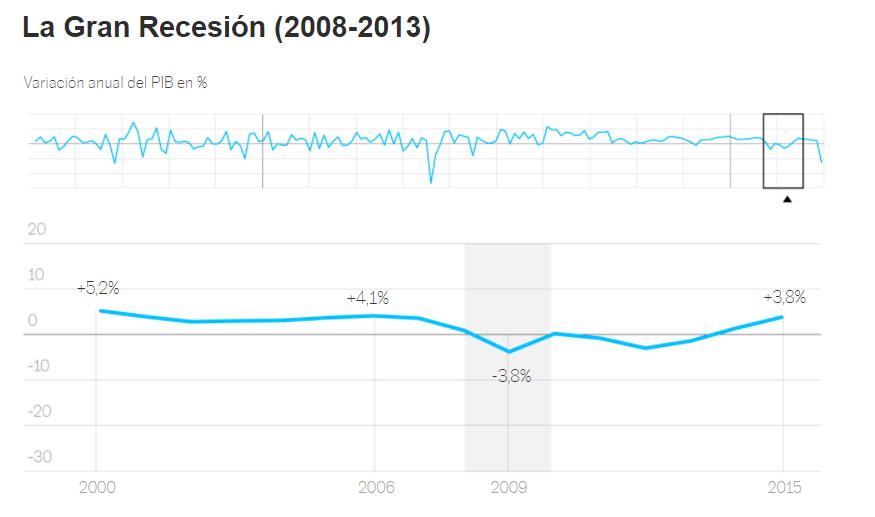

In [3]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RECESION2008.png'), width = 600)

<p style='text-align: justify;'>  En 2014 se inició la recuperación y cuando parecía que recuperábamos todas las sensaciones, actividad y evidencias económicas de haber olvidado la crisis ,  en 2020 nos encontramos con una de las peores crisis sanitarias de la historia de nuestra edad moderna generando todavía mayores dificultades y retrocesos que las anteriormente vividas.  </p>

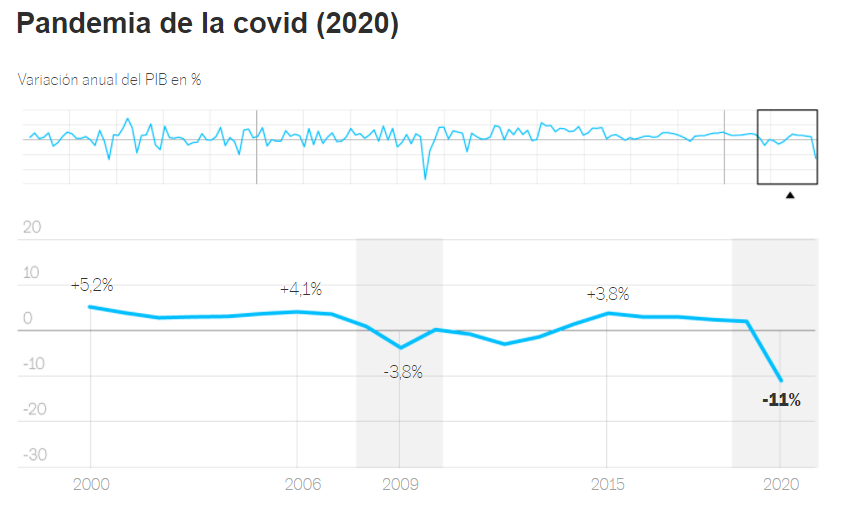

In [4]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RECESION COVID.png'),width = 600)

<p style='text-align: justify;'> Como consecuencia de las diferentes crisis vividas, la reducción de los tipos de interés y de los beneficios obtenidos por el puro negocio tradicional de captar y prestar dinero, este modelo de negocio había dejado de ser el motor principal de la cuenta de resultados de una entidad.  
<p style='text-align: justify;'>La venta de otros productos financieros como los Fondos de Inversión, Planes de Pensión y los seguros de riesgo entre otros, consiguieron acaparar toda la importancia. Hoy en día, la generación de comisiones adheridas a la comercialización de estos productos ha supuesto un vuelco en la estrategia comercial, especializándose y poniendo el foco en su venta mediante el asesoramiento especializado a los clientes por parte de los empleados de las sucursales.</p>

### __1.3 Objetivos.__

<p style='text-align: justify;'>Los Seguros de Riesgo comercializados en las oficinas bancarias, así como su mantenimiento en cartera durante 5 años de media, son de gran importancia dentro de la cuenta de resultados de una oficina y por extensión de un banco.  En este escenario y a través de un conjunto de datos pertenecientes a 450.000 clientes he querido desarrollar un modelo predictivo de compra de estos productos financieros concretando en los Seguros del Hogar.</p>



### __1.4 Finalidad.__

<p style='text-align: justify;'> Generar un modelo predictivo de clasificación que ayude a toda la fuerza comercial de las sucursales a orientar la comercialización, a optimizar los tiempos, metodologías y sistemas utilizados. Todo ello en busca de un mayor éxito de ventas,  generación de margen económico y satisfacción de los clientes.</p>

### __1.5 Interes.__

<p style='text-align: justify;'> El interés de esta investigación se centra en tres niveles; Empresarial, Comercial y Optimización Comercial.</p>

<p style='text-align: justify;'>•	Intereses Empresariales: El principal objetivo de una entidad financiera, como cualquier otra empresa privada es maximizar el beneficio que sus socios han invertido, y por los cuales, esperan un retorno a través del reparto de dividendos.  La generación de comisiones por la venta de seguros es una de las vías más importantes para generar beneficios y en consecuencia una mayor cuenta de resultados.</p>

<p style='text-align: justify;'>•	Desde el punto de vista comercial, la competencia a nivel de mediación y venta de seguros en grandísima.  No solo las propias entidades aseguradoras, sino que todas las entidades financieras de hoy en día venden seguros.  El hecho de asesorar, vender y captar a un nuevo cliente a medio largo plazo es un hito importante que hay que potenciar. </p>

<p style='text-align: justify;'>•	Por último, hablar de la optimización del trabajo.  No solo hay que trabajar duro, sino trabajar de forma eficaz y eficiente.  La jornada laboral de un empleado de banca se resume en Asesorar y vender.  Hay que vender y hay que llegar a cuantos más clientes mejor.  Si todo esto lo hacemos centrando la llamada, optimizando el tiempo, sabiendo a quien llamamos,  a quien nos dirigimos y porqué, mejoraremos en todos los sentidos esa eficiencia y eficacia buscada.</p>


--- 
---

## __2. Estado del Arte__

### __2.1 Marco__

<p style='text-align: justify;'>Las Entidades Financieras y los seguros, son el principal sustento de nuestro sistema financiero y asegurador. La economía de cualquier país tiene como pilares principales a estos dos sectores. Tanto la Banca como las aseguradoras están en constante desarrollo tecnológico y organizativos.  Ambos sectores jugarán siempre un papel principal en cualquier crisis presente o futura ya que en ellos están depositados planteamientos de recuperación solvencia y liquidez para minimizar el impacto económico en empresas y hogares.
<p style='text-align: justify;'>Algunos datos de 2020. En los primeros meses lógicamente influenciada por la gran crisis sanitaria que vivimos, se redujo la siniestralidad en ramos como autos o viajes y aumentó en ramos de decesos, impago de alquileres, vida y salud. 

<p style='text-align: justify;'>A nivel empresarial se ha evidenciado una alta tasa de anulación de pólizas.  Pymes y autónomos son sectores que han padecido con mayor intensidad esta pandemia teniendo como consecuencia cierre de comercios y empresas.
  

<p style='text-align: justify;'>Motivado por todo este descenso asegurador, las primas has subido en las renovaciones y se han incrementado riesgos que antes no había. Ej. riesgos cibernéticos y medioambientales.

<p style='text-align: justify;'>Predicciones para seguros en 2021. La escalada de precios en el mercado global de seguros se hará evidente. Daños Materiales, Responsabilidad Civil, D&O y Ciberriesgos serán las líneas de negocio más afectadas. La carga de siniestros relacionados con la pandemia se reducirá progresivamente debido a la exclusión de las coberturas pandémicas en los acuerdos objeto de renovación

 ### __2.2 Seguros en España – Cifras__
Todos los años el INE publica un detalle de los gastos y presupuestos de las Familias españolas.  Entre ellos están lo que se gasta en seguros detallándolo por familia exceptuando los de vida que no se informan. 


### __2.3 Tipos de seguros contratados en España.  Evolucion anual__

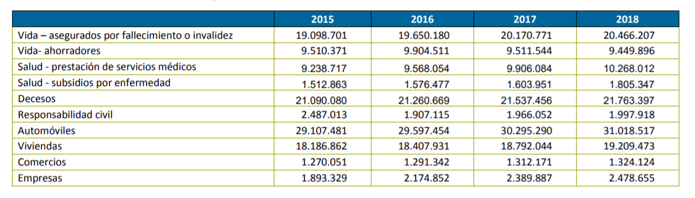

In [6]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TIPOSDESEGUROSCONTRATADOSENESPAÑA.png'),width = 700)

<p style='text-align: justify;'>Actualmente estamos censados en España 46.722.980 habitantes, contando con un parque de seguros que supera los 119.000.000 de seguros a 2018.  El número de seguros de Hogar- Vivienda asciende a más de 19.000.000.  Un 15% del total. 
<p style='text-align: justify;'>El aseguramiento de las viviendas españolas tiene un crecimiento continuo.  Mas de 1MM de seguros de hogar se han contratado en el periodo de 2015 a 2018.  Seguros de Auto y de Vivienda son los que más crecimiento han tenido. 
 
 
		    


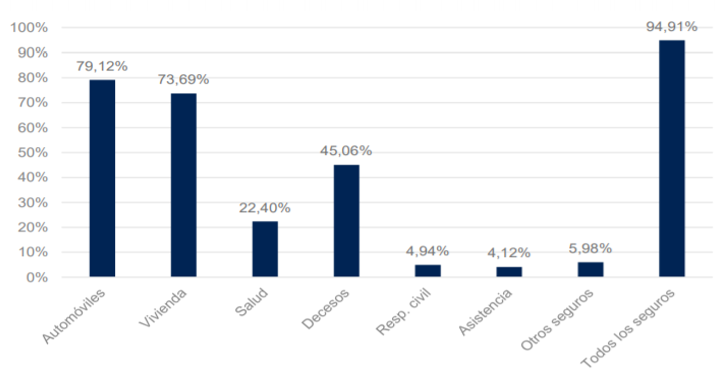

In [10]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TIPOSDESEGUROSCONTRATADOSENESPAÑADOS.png'),width = 600)

### __2.4 Tipos de servicio del seguro español__

Quitando los servicios médicos, la demanda de servicios de hogar supone el 10% de la demanda de servicios aseguradores.

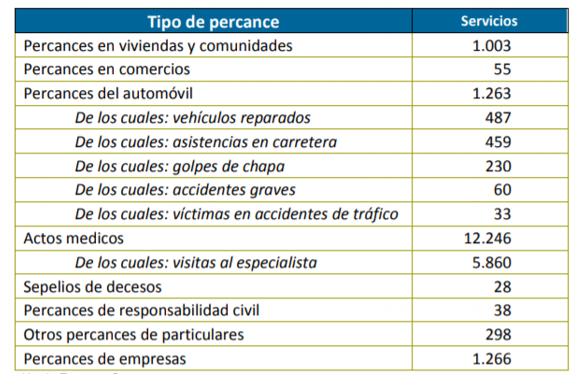

In [9]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TIPOPERCANCE.png'),width = 500)

### __2.5 Nivel de contrataciones seguro de hogar por edades__

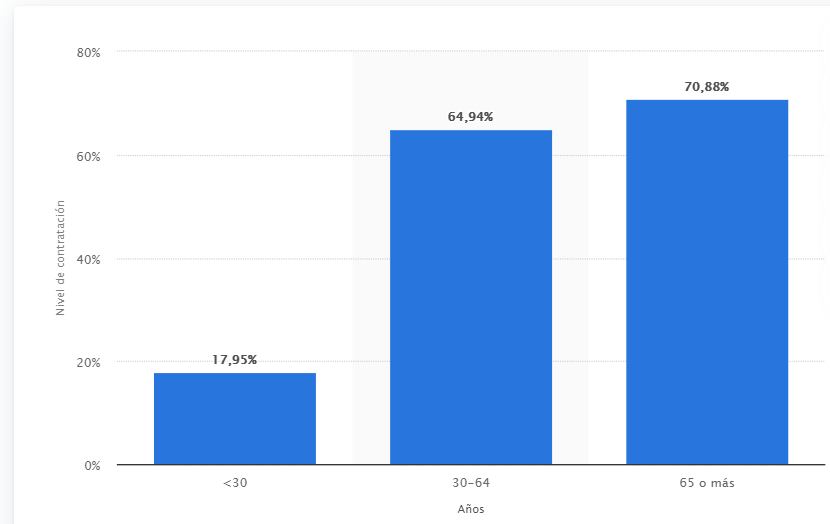

In [11]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TIPOSDECONTRATADOSPOREDAD.png'),width = 500)

Esta grafica visualiza como el seguro de hogar es contratado a partir de los 30 años.  Claramente influenciado por el modelo de vida y dificultad de acceso a la vivienda de las personas jóvenes.  Esto lo podremos ver en nuestro modelo predictivo

###  __2.6 Contratacion de los distintos seguros por ingresos familiaries__

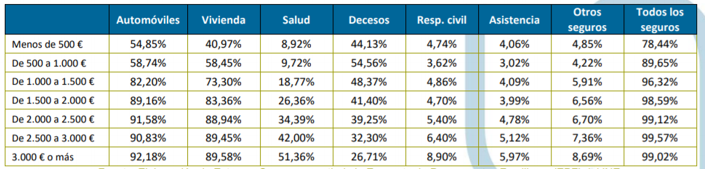

In [13]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TIPOSDECONTRATADOSPORINGRESOS.png'),width = 700)

Las contrataciones de los seguros de hogar dependen en gran medida de los ingresos familiares.  Se evidencia un gran corte en los hogares.  Las contrataciones despegan con los hogares donde se ingresan mínimo 1000€.

### __2.7 Niveles de contratacion hogar en Europa__

Por último, visualizar a nivel europeo las diferencias de gasto en los seguros de hogar.

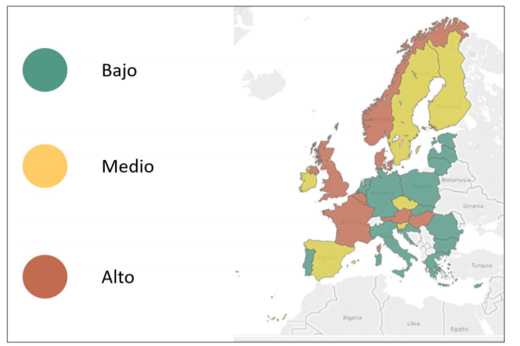

In [15]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TIPOEUROPA.png'),width = 400)

### __2.8 Conclusiones__

<p style='text-align: justify;'>El seguro de hogar está muy arraigado en la sociedad española. La cantidad del presupuesto del hogar destinada a los seguros como en el caso de cualquier otro componente de dicho gasto, depende de muchos factores estructurales y contextuales de cada hogar, como el lugar de residencia, la situación laboral de la familia, la escala salarial de sus integrantes, etc. 
<p style='text-align: justify;'>Modelo. Con los datos y variables disponibles intentaremos entrenar una solución comercial que facilite la venta de este producto a los asesores de las entidades financieras.
<p style='text-align: justify;'>Dentro del sector financiero existen múltiples modelos de clasificación relacionados con las distintas necesidades.
    
•	Modelos de Riesgo
    
•	Modelos de Morosidad
    
•	Modelos de RRHH
    
•	Modelos de Segmentación Clientes
    
•	Modelos de ventas FFII – PP – Seguros – Servicios Financieros
    
•	Modelos de clientes digitales


--- 
---

## __3. Caso de Uso__

### __3.1 Planteamiento.__

Modelo predictivo contratación de seguros de hogar

### __3.2 Importancia del Problema a resolver.__

<p style='text-align: justify;'> La generación de comisiones es fundamental para la cuenta de resultados de la oficina y del banco.  Los seguros de hogar se quedan en cartera durante un periodo medio de 5 años. Cada seguro de hogar contratado deja una comisión directa del 15 %.  Esto sobre un seguro de hogar de prima media de 300€ supone 45€ de comisión anual por cliente.   <p style='text-align: justify;'> Nuestra base de datos correspondiente únicamente a 162 oficinas y 450.000 clientes podría llegar a generar unas comisiones anuales de más de 17mm€.  Solo con esta cifra y extrapolándola a un colectivo de 3 – 4 millones de clientes,  queda más que explicado la evidente y clara la necesidad de identificar potenciales clientes que sean susceptibles de contratar el seguro de hogar.</p>

### __3.3 Datos Utilizados.__

<p style='text-align: justify;'> Los datos provienen de la suma de diferentes conjuntos de información obtenidos directamente de la entidad financiera. 
<p style='text-align: justify;'>TODOS LOS DATOS HAN SIDO ANONIMIZADOS. SE HAN ELIMINADO LOS NOMBRES Y EL NÚMERO DE CLIENTES INTERNOS, SE HAN ELIMINADO EL NÚMERO Y LAS ESPECIFICACIONES DE LAS DIRECCIONES DE ÁREA Y DE OFICINA Y, POR ÚLTIMO, SE HAN ELIMINADO LOS NOMBRES DE LOS ASESORES COMERCIALES.
<p style='text-align: justify;'>A todos estos datos se les ha asignado un número de identificación ficticio y secuencial, quedando únicamente los datos de tenencia o no de producto por parte de los clientes.</p>

 ### __3.4 Variables utilizadas.__

•__DZ__:  Identificación Dirección de Zona a la que pertenece la oficina. Una Dirección de Zona engloba varias oficinas. Total 11 Direcciones de Zona

•	__OFICINA__: Numero de Oficina / Sucursal de banco

•	__CLIENTE__: Numero de cliente

•	__EDAD__:  Edad del cliente

•	__ESTA_CARTERIZADO__:   Identifica si el cliente pertenece o no a una cartera.

•	__CARTERA_PATRON__:  Tipo de cartera a la que pertenece el cliente. 

        -	Asesoramiento Financiero 
        -	Tutela.  Familiar de cliente Asesoramiento Financiero
        
•	__CLIENTE_BBP__: Cliente con saldos superiores a 500.000€ identificado como colectivo Banca Privada.

•	__GESTOR__:  Numero identificación del gestor/ Asesor Financiero de la sucursal

•	__TIP_GESTOR__: Figura de una oficina que ofrece el asesoramiento.

•	__CODIGO_CARTERA__: Numero identificación cartera a la que pertenece el cliente.

•	__MARCA_AF_CCTE__:  Identifica si el tipo de gestor es de oficina u Online.

    -   AF- Asesor Financiero (Oficina)
    -   CCTE – Gestor Online
    
•	__MARCA_BANCA_PERSONAL__:  Cliente perteneciente a cartera Asesoramiento Financiero e identificado como colectivo Banca -Personal.

•	__SEGMENTO_RECORRIDO__: Identifica el potencial recorrido comercial del cliente para una mayor vinculación. 

    -    Alto 
    -	Medio 
    -	Bajo 
        
• __SEGMENTO_VALOR__:  Valor del cliente

    -	Alto ( Alto nivel Patrimonial o alto nivel de vinculación )
    -	Medio ( Clientes que sin cumplir el anterior requisito tienen un alto nivel de fidelización.
    -	Bajo ( Resto de clientes )
    
• __CAMINO_DIGITAL__: Se diferencian 4 tipo de clientes según la utilización de canales digitales.

    -	Comprador
    -	Consultivo
    -	Transaccional
    -	Poco uso
    
• __DIGITAL_3_MESES__:  Identifica si el cliente ha utilizado medios digitales durante los últimos 3 meses.

• __LP_DOMIC_INGRESOS__: Tiene o no tiene ingresos domiciliados

• __LP_OFIC_INTERNET__: Tiene o no tiene servicio internet

•	__LP_REC_LTGA_OTR__: Tiene o no tiene recibos domiciliados

•	__LP_SEG_ACCIDENT__: Tiene o no tiene seguro accidentes contratado

•	__LP_SEG_AUTO__: Tiene o no tiene seguro automóvil contratado

•	__LP_SEG_MEDICOS__: Tiene o no tiene seguro salud privado contratado

•	__LP_SEG_MULTIRRIES__: Tiene o no tiene seguro hogar contratado

•	__LP_SEG_VIDA__: Tiene o no tiene seguro vida contratado

•	__LP_TARJ_CREDITO__: Tiene o no tiene tarjeta crédito pago fin de mes contratada

•	__LP_TARJ_REVOLVING__: Tiene o no tiene tarjeta crédito pago fraccionado contratada

•	__SF_AH_CAPTACION_TT__: Saldo en cuenta de ahorro

•	__SF_FINANCIACION_TT__: Importe financiación en activo.

•	__SF_FONDOS_INVER__: Saldo en Fondo de Inversión

•	__SF_PLAN_PENSION__: Saldo Plan de Pensión



### __3.4 Modelos Machine Learning utilizados.__

•	Modelo Clasificación Regresión Logística 

•	Modelo Clasificación K-Nearest Neighbor 

•	Modelo Clasificación TREE

•	Modelo Clasificación Xgboost

•	Modelo Clasificación Landon Forest - MODELO FINAL ELEGIDO



--- 
---

## __4. Desarrollo y Construccion del Modelo__

### __4.1 Información del Repositorio__

Toda la información de este TFM ha quedado recogida en un repositorio de GitHub al cual se accede a través de la siguiente dirección. 
https://github.com/romayana/Financial-Product-Sales-Forecast-Model.git

El repositorio se estructura en   7 carpetas y 4 archivos. ( Según posición en repositorio )

- Carpeta 1 – Códigos Python Limpieza y Unión 
- Carpeta 2 – Códigos Python EDA Análisis Exploratorio
- Carpeta 3 – Frontend.  Aplicación creada para nuestro modelo (APP CallorNot.)
- Carpeta 4 – Imágenes .png guardadas de cada una de las gráficas construidas
- Carpeta 5 – Memoria. Documento y notebooks memoria.
- Carpeta 6 – Códigos Python Modelos clasificación utilizados.
- Carpeta 7 – Códigos Python Preprocesado
- Archivo 1 – archivo .gitignore.  Archivos descartados en las actualizaciones del repositorio
- Archivo 2 – Diccionario e información del significado de las variables
- Archivo 3 – Memoria TFM.doc
- Archivo 4 – Readme con primera información del Trabajo y comunicación de expectativas


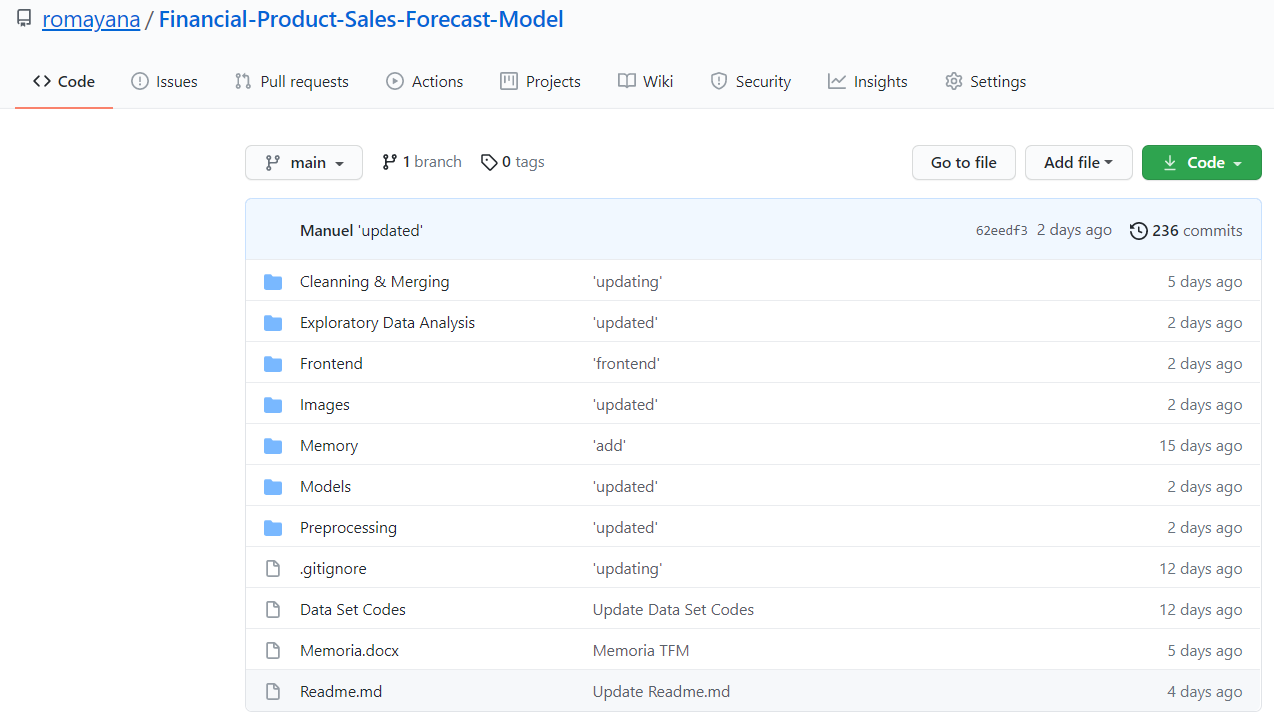

In [5]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/IMAGENREPOSITORIO.png'),width = 600)

### __4.2 Requisitos Tecnicos__

<p style='text-align: justify;'> Para ejecutar los códigos es necesario tener instalado Python versión 3.8 así como distintos paquetes o librerías.  Se recomienda tener instalada la Suite Anaconda donde se encontrarán preinstalados la mayoría de los paquetes y librerías que son necesarias.</p>

Librerías utilizadas. La mayoría ya precargadas en Suite Anaconda

• Librerías manejo y análisis de estructuras de datos.

    - import pandas as pd

• Librerías especializada en el cálculo numérico y el análisis de datos

    - import numpy as np

• Librerías de Métricas

    - from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
    - from sklearn.metrics import roc_auc_score, roc_curve
    - from sklearn.metrics import confusion_matrix
    - from sklearn.metrics import classification_report
    - from sklearn.metrics import auc
    - from sklearn.model_selection import KFold
    - from sklearn.metrics import log_loss
    - from sklearn.model_selection import cross_val_score

• Librerías de Visualización

    - import matplotlib.pyplot as plt
    - import pylab as pl
    - import seaborn as sns 
    - from pylab import rcParams 
    - from matplotlib import pyplot

• Librerías de Modelos

    - from sklearn.linear_model import LogisticRegression
    - from sklearn.neighbors import KNeighborsClassifier
    - from sklearn.neighbors import KNeighborsRegressor
    - from sklearn.tree import DecisionTreeClassifier 
    - from sklearn.ensemble import RandomForestClassifier
    - from sklearn.model_selection import train_test_split 
    - from collections import Counter
    - from imblearn.over_sampling import SMOTE 
    - from imblearn.under_sampling import NearMiss


• Adicionalmente será necesaria la instalación de las siguientes librerías.

    - Imbalanced learn – proporciona herramientas cuando se trata de la clasificación con clases desequilibradas. (Instalación mediante consola - pip install imbalanced learn )

    - pydotplus - Visualización de árboles de decisión en Python con PyDotPlus. ( instalación mediante consola  - pip install pydotplus )

    - streamlit – creación e intercambio de aplicaciones web personalizadas para el aprendizaje automático y la ciencia de datos.  ( instalación mediante consola - pip install setreamlit )



### __4.3 Guia Ejecucion y Carga de Base de Datos__


__Paso 1.	Clonar repositorio GitHub__ https://github.com/romayana/Financial-Product-Sales-Forecast-Model.git en carpeta local elegida.


__Paso 2.	Descargar base de datos:__

<p style='text-align: justify;'> A pesar de haberse Anonimizado toda la base de datos, se ha decidido que la misma no estará disponible en el repositorio de GitHub.  Para acceder a la base de datos ubicada en el Google Drive del propietario del TFM,   se tendrá que solicitar permiso y acceso a la misma  dirigiendo correo electrónico a manuelgonzalezprados@gmail.com el cual previa valoración de los fines y objetivos perseguidos podrá compartir el enlace con la persona solicitante.</p>

<p style='text-align: justify;'> Una vez compartido el acceso,  descargar y ubicar la carpeta entera llamada Origin_Data dentro de la carpeta carpeta local donde se ha clonado el repositorio junto con el resto de carpetas.

__Paso 3.	Ejecutar código con la siguiente secuencia y orden__. Los archivos csv se irán guardando en cada una de las carpetas.

	1º Carpeta Leasing & Merging
    -	_merging_data,ipynb 
    -	_cleanning_data.ipynb
    
	2º Carpeta Exploratory Data Analysis
    -	EDA.ipynb

	3º Carpeta Preprocessing
    -	Preprocessing.ipynb
    
	4º Carpeta Models
    -	Ejecutar los modelos.
    
	5º Carpeta Frontend
    -	Aplicación Callornot.


(Este notebook tiene la posibilidad de ser ejecutado independientemente desde la primera fase de merge hasta el propio modelo)

__4.4 Informacion y extraccion de la Base de Datos__

<p style='text-align: justify;'>La información y explicación detallada de las variables que conforman la base de datos se encuentra dentro de una de las carpetas de este repositorio con el nombre de Data-Set-Codes.  También ha quedado explicada dentro de esta memoria en la sección 3.4 Variables utilizadas.
<p style='text-align: justify;'>La extracción de los datos se ha realizado desde un sistema de información de gestión de una entidad financiera. Sistema de información que guarda millones de datos de tipo financiero y económicos.
<p style='text-align: justify;'>Toda la información y datos necesarios para el estudio del modelo de clasificación se han obtenido de forma directa y con permisos limitados de una entidad financiera real.  Permisos limitados ya que no se ha podido disponer de mucha información que hubiese mejorado el modelo. Información como por ejemplo género, estado civil,  hijos, clase económica,  renta disponible,   importe de nómina,  detalle de compras realizadas,  detalle de llamadas comerciales realizadas y otras muchas variables.
<p style='text-align: justify;'> Para la construcción de la base de datos final se han ido descargando de este sistema de información de gestión y de forma manual, archivos individuales extensión xlsx, relacionados con distintos epígrafes como saldos en cuenta, saldos en fondos de inversión o planes de pensión, líneas de producto, tarjetas, seguros o tipo de segmentación. En total han sido 99 archivos Excel descargados. 9 archivos por cada una de las 11 Direcciones de Zona disponibles lo que ha generado finalmente una base de datos de 15 millones de datos de 450.000 clientes.
<p style='text-align: justify;'>El peso total de los datos originales es de 112 MB (117.706.752 bytes) los cuales después de haber sido limpiados se han quedado en 70,3 MB (73.742.213 bytes).
<p style='text-align: justify;'>La carpeta origin_data está compuesta por las distintas carpetas y archivos Excel descargados ya anonimizados.  Los datos se han  anonimizado previamente al guardado en esta carpeta.  Numero de identificador de cliente ha sido cambiado por una secuencia desde 1 a 450.000. Números y códigos distintivos de las Direcciones de Zona han sido cambiados por una secuencia del 1 al 11.  Nombres , direcciones y números de identificación fiscal de los clientes han sido eliminados.
<p style='text-align: justify;'>Detalle Carpeta con Datos Originales. 11 carpetas x 9 archivos.


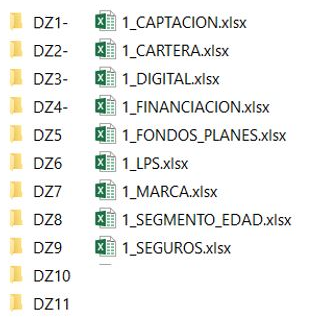

In [6]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/IMAGENCONSTRUCCIONBD.png'),width = 250)

### __4.5 Objetivos__

<p style='text-align: justify;'>A través de un conjunto de datos pertenecientes a 450.000 clientes he querido desarrollar un modelo predictivo de potencial compra de estos productos financieros, concretando en el Seguro de Hogar. Un modelo predictivo de clasificación que ayude a toda la fuerza comercial de las sucursales a orientar la comercialización, a optimizar los tiempos, metodologías y sistemáticas utilizadas. Todo ello en búsqueda de un mayor éxito de ventas  satisfacción de los clientes y generación de margen para la entidad financiera.
<p style='text-align: justify;'>Mi objetivo final será implementar una aplicación ( CallorNot) donde mediante un cuestionario, incorporando una serie de características de un cliente podamos predecir la posibilidad de que ese cliente sea susceptible de contratar o no un seguro de hogar, sugiriendo finalmente si llamar o no llamar al cliente.”


### __4.6  Union de Archivos y Preparacion de los Datos__

•	__Unión.__ <p style='text-align: justify;'>11 carpetas correspondientes a 11 Direcciones de Zona y 9 archivos Excel cada uno se fusionan en un solo Data Frame. 
De forma secuencial se han ido leyendo los archivos de cada una de las Direcciones de Zona creando una única lista agregada por DZ y finalmente uniendo en una sola base de datos la totalidad de los 99 archivos Excel originales individuales.
Todo el proceso de unión está ubicado en el notebook  _merging_data.ipynb al cual se puede acceder dentro de la carpeta Cleanning & Merging del repositorio.

In [7]:
# Union
# Cleaning & Preparing Data.
import pandas as pd
from functools import reduce

In [8]:
# CAMBIAR SEGUN RUTA LOCAL HASTA UBICACION DE REPOSITORIO
ruta = '/Users/manue/TFM'

In [9]:
### LECTURA DE LOS DATOS
### Lectura datos dz1
captacion1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_CAPTACION.xlsx')
cartera1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_CARTERA.xlsx')
digital1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_DIGITAL.xlsx')
financiacion1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_FINANCIACION.xlsx')
fondos_planes1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_FONDOS_PLANES.xlsx')
lps1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_LPS.xlsx')
marca1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_MARCA.xlsx')
segmento_edad1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_SEGMENTO_EDAD.xlsx')
seguros1 = pd.read_excel(ruta + '/Financial-Product-Sales-Forecast-Model/0rigin_data/dz1/1_SEGUROS.xlsx')
### Lectura datos dz2
captacion2 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_CAPTACION.xlsx')
cartera2  = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_CARTERA.xlsx')
digital2  = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_DIGITAL.xlsx')
financiacion2  = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_FINANCIACION.xlsx')
fondos_planes2  = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_FONDOS_PLANES.xlsx')
lps2  = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_LPS.xlsx')
marca2  = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_MARCA.xlsx')
segmento_edad2  = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_SEGMENTO_EDAD.xlsx')
seguros2  = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz2/2_SEGUROS.xlsx')
### Lectura datos dz3
captacion3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_CAPTACION.xlsx')
cartera3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_CARTERA.xlsx')
digital3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_DIGITAL.xlsx')
financiacion3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_FINANCIACION.xlsx')
fondos_planes3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_FONDOS_PLANES.xlsx')
lps3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_LPS.xlsx')
marca3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_MARCA.xlsx')
segmento_edad3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_SEGMENTO_EDAD.xlsx')
seguros3 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz3/3_SEGUROS.xlsx')
### Lectura datos dz4
captacion4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_CAPTACION.xlsx')
cartera4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_CARTERA.xlsx')
digital4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_DIGITAL.xlsx')
financiacion4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_FINANCIACION.xlsx')
fondos_planes4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_FONDOS_PLANES.xlsx')
lps4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_LPS.xlsx')
marca4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_MARCA.xlsx')
segmento_edad4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_SEGMENTO_EDAD.xlsx')
seguros4 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz4/4_SEGUROS.xlsx')
### Lectura datos dz5
captacion5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_CAPTACION.xlsx')
cartera5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_CARTERA.xlsx')
digital5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_DIGITAL.xlsx')
financiacion5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_FINANCIACION.xlsx')
fondos_planes5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_FONDOS_PLANES.xlsx')
lps5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_LPS.xlsx')
marca5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_MARCA.xlsx')
segmento_edad5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_SEGMENTO_EDAD.xlsx')
seguros5 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz5/5_SEGUROS.xlsx')
### Lectura datos dz6
captacion6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_CAPTACION.xlsx')
cartera6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_CARTERA.xlsx')
digital6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_DIGITAL.xlsx')
financiacion6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_FINANCIACION.xlsx')
fondos_planes6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_FONDOS_PLANES.xlsx')
lps6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_LPS.xlsx')
marca6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_MARCA.xlsx')
segmento_edad6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_SEGMENTO_EDAD.xlsx')
seguros6 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz6/6_SEGUROS.xlsx')
### Lectura datos dz7
captacion7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_CAPTACION.xlsx')
cartera7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_CARTERA.xlsx')
digital7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_DIGITAL.xlsx')
financiacion7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_FINANCIACION.xlsx')
fondos_planes7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_FONDOS_PLANES.xlsx')
lps7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_LPS.xlsx')
marca7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_MARCA.xlsx')
segmento_edad7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_SEGMENTO_EDAD.xlsx')
seguros7 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz7/7_SEGUROS.xlsx')
### Lectura datos dz8
captacion8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_CAPTACION.xlsx')
cartera8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_CARTERA.xlsx')
digital8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_DIGITAL.xlsx')
financiacion8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_FINANCIACION.xlsx')
fondos_planes8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_FONDOS_PLANES.xlsx')
lps8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_LPS.xlsx')
marca8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_MARCA.xlsx')
segmento_edad8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_SEGMENTO_EDAD.xlsx')
seguros8 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz8/8_SEGUROS.xlsx')
### Lectura datos dz9
captacion9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_CAPTACION.xlsx')
cartera9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_CARTERA.xlsx')
digital9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_DIGITAL.xlsx')
financiacion9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_FINANCIACION.xlsx')
fondos_planes9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_FONDOS_PLANES.xlsx')
lps9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_LPS.xlsx')
marca9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_MARCA.xlsx')
segmento_edad9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_SEGMENTO_EDAD.xlsx')
seguros9 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz9/9_SEGUROS.xlsx')
### Lectura datos dz10
captacion10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_CAPTACION.xlsx')
cartera10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_CARTERA.xlsx')
digital10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_DIGITAL.xlsx')
financiacion10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_FINANCIACION.xlsx')
fondos_planes10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_FONDOS_PLANES.xlsx')
lps10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_LPS.xlsx')
marca10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_MARCA.xlsx')
segmento_edad10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_SEGMENTO_EDAD.xlsx')
seguros10 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz10/10_SEGUROS.xlsx')
### Lectura datos dz11
captacion11 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_CAPTACION.xlsx')
cartera11 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_CARTERA.xlsx')
digital11 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_DIGITAL.xlsx')
financiacion11= pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_FINANCIACION.xlsx')
fondos_planes11 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_FONDOS_PLANES.xlsx')
lps11 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_LPS.xlsx')
marca11 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_MARCA.xlsx')
segmento_edad11 = pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_SEGMENTO_EDAD.xlsx')
seguros11= pd.read_excel(ruta +'/Financial-Product-Sales-Forecast-Model/0rigin_data/dz11/11_SEGUROS.xlsx')

In [10]:
### Merge de cada dz
#Creamos listas uniendo los segmentos cada una de las Direcciones de Zona
data_frames1 = [captacion1, cartera1, digital1,financiacion1,fondos_planes1,lps1,marca1,segmento_edad1,seguros1]
data_frames2 = [captacion2, cartera2, digital2,financiacion2,fondos_planes2,lps2,marca2,segmento_edad2,seguros2]
data_frames3 = [captacion3, cartera3, digital3,financiacion3,fondos_planes3,lps3,marca3,segmento_edad3,seguros3]
data_frames4 = [captacion4, cartera4, digital4,financiacion4,fondos_planes4,lps4,marca4,segmento_edad4,seguros4]
data_frames5 = [captacion5, cartera5, digital5,financiacion5,fondos_planes5,lps5,marca5,segmento_edad5,seguros5]
data_frames6 = [captacion6, cartera6, digital6,financiacion6,fondos_planes6,lps6,marca6,segmento_edad6,seguros6]
data_frames7 = [captacion7, cartera7, digital7,financiacion7,fondos_planes7,lps7,marca7,segmento_edad7,seguros7]
data_frames8 = [captacion8, cartera8, digital8,financiacion8,fondos_planes8,lps8,marca8,segmento_edad8,seguros8]
data_frames9 = [captacion9, cartera9, digital9,financiacion9,fondos_planes9,lps9,marca9,segmento_edad9,seguros9]
data_frames10 = [captacion10,cartera10,digital10,financiacion10,fondos_planes10,lps10,marca10,segmento_edad10,seguros10]
data_frames11 = [captacion11,cartera11,digital11,financiacion11,fondos_planes11,lps11,marca11,segmento_edad11,seguros11]

In [11]:
#Procedemos a unir cada una de las direcciones de zona en un sola variable.
#Conseguimos 10 variables distintas coincidiendo con las Direcciones de zona existentes.
dz1_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames1)
dz2_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames2)
dz3_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames3)
dz4_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames4)
dz5_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames5)
dz6_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames6)
dz7_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames7)
dz8_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames8)
dz9_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames9)
dz10_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames10)
dz11_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PERSONA'],
                                            how='outer'), data_frames11)

In [12]:
#Confirmamos que el merge ha tenido efecto.
dz1_merged.columns

Index(['DZ_x', 'OFICINA_x', 'PERSONA', 'SF_AH_CAPTACION_TT', 'DZ_y',
       'OFICINA_y', 'ESTA_CARTERIZADO', 'CLIENTE_BBP', 'TIP_GESTOR', 'GESTOR',
       'CARTERA_PATRON', 'CODIGO_CARTERA', 'DZ_x', 'OFICINA_x',
       'DIGITAL_3_MESES', 'CAMINO_DIGITAL', 'DZ_y', 'OFICINA_y',
       'SF_FINANCIACION_TT', 'DZ_x', 'OFICINA_x', 'SF_FONDOS_INVER',
       'SF_PLAN_PENSION', 'DZ_y', 'OFICINA_y', 'LP_DOMIC_INGRESOS',
       'LP_TARJ_CREDITO', 'LP_TARJ_REVOLVING', 'LP_REC_LTGA_OTR',
       'LP_OFIC_INTERNET', 'DZ_x', 'OFICINA_x', 'MARCA_BANCA_PERSONAL',
       'MARCA_AF_CCTE', 'DZ_y', 'OFICINA_y', 'EDAD', 'SEGMENTO_VALOR',
       'SEGMENTO_RECORRIDO', 'DZ', 'OFICINA', 'LP_SEG_VIDA', 'LP_SEG_ACCIDENT',
       'LP_SEG_MEDICOS', 'LP_SEG_MULTIRRIES', 'LP_SEG_AUTO'],
      dtype='object')

In [13]:
#Eliminamos las columnas que no necesitamos en cada una de las Direcciones de Zona
dz1_merged.drop(dz2_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz2_merged.drop(dz2_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz3_merged.drop(dz3_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz4_merged.drop(dz4_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz5_merged.drop(dz5_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz6_merged.drop(dz6_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz7_merged.drop(dz7_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz8_merged.drop(dz8_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz9_merged.drop(dz9_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz10_merged.drop(dz10_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)
dz11_merged.drop(dz11_merged.columns[[0,1,4,5,12,13,16,17,19,20,23,24,
                                    30,31,34,35]],axis='columns', inplace = True)


In [14]:
#Finalemente unimos cada en un solo Data Frame todas las Direcciones de Zona.
df = pd.concat([dz1_merged,dz2_merged,dz3_merged,dz4_merged,dz5_merged,
                   dz6_merged,dz7_merged,dz8_merged,dz9_merged,
                   dz10_merged,dz11_merged])
#Listamos su dimension y el nombre de las columnas.  
print(df.shape)
print(df.columns)

#les cambiamos los nombres a minusculas.
df.columns = ['cliente', 'saldo_captacion', 'esta_carterizado',
       'cliente_bbp', 'tipo_gestor', 'gestor', 'cartera_patron',
       'codigo_cartera', 'digital_3_meses', 'camino_digital',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'marca_bp',
       'marca_ccte', 'edad', 'seg_valor', 'seg_recorrido', 'dz', 'oficina',
       'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto']


(451374, 30)
Index(['PERSONA', 'SF_AH_CAPTACION_TT', 'ESTA_CARTERIZADO', 'CLIENTE_BBP',
       'TIP_GESTOR', 'GESTOR', 'CARTERA_PATRON', 'CODIGO_CARTERA',
       'DIGITAL_3_MESES', 'CAMINO_DIGITAL', 'SF_FINANCIACION_TT',
       'SF_FONDOS_INVER', 'SF_PLAN_PENSION', 'LP_DOMIC_INGRESOS',
       'LP_TARJ_CREDITO', 'LP_TARJ_REVOLVING', 'LP_REC_LTGA_OTR',
       'LP_OFIC_INTERNET', 'MARCA_BANCA_PERSONAL', 'MARCA_AF_CCTE', 'EDAD',
       'SEGMENTO_VALOR', 'SEGMENTO_RECORRIDO', 'DZ', 'OFICINA', 'LP_SEG_VIDA',
       'LP_SEG_ACCIDENT', 'LP_SEG_MEDICOS', 'LP_SEG_MULTIRRIES',
       'LP_SEG_AUTO'],
      dtype='object')


In [15]:
# Generamos archivo csv 
df.to_csv('df_merged.csv', index = False)

•	__Preprocesado y Limpieza de los datos__.  <p style='text-align: justify;'>Esta tarea de preprocesado de los datos o sencillamente de preparación de los datos,  la iremos realizando a lo largo de nuestro estudio y en distintas secciones .  Detectaremos Nans o valores nulos, se corregirán, se buscarán posibles outliers en variables,  se buscarán las mejores o más importantes variables mediante técnicas de feature selection,  se estudiará la posible reducción de dimensionalidad, convertiremos variables categóricas en numéricas y normalizaremos las variables a una escala común.  Todo ello con el fin de construcción un data set de calidad y así poder trabajar con la mejor información de datos para la construcción definitiva del modelo.
<p style='text-align: justify;'>Inicialmente utilizamos la base de datos resultado del anterior proceso de unión.  Esta base de datos cuenta con 451.374 filas y 30 columnas.   

<p style='text-align: justify;'>La primera decisión que tomamos con el data set recién construido y unido es estudiar y visualizar posibles deficiencias con la detección de valores Nans.  De 30 variables, encontramos 10 que contienen Nans. Dado el conocimiento que tenemos de la base de datos, estas se rellenan con distintos valores acordes a la categoría y segmento del dato.
Este primer proceso de limpieza está ubicado en el notebook  _cleanning_data.ipynb al que se puede acceder dentro de la carpeta Cleanning & Merging de este repositorio.


In [16]:
#Leemos el Data Frame creado con el anterior paso de Merge.
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Memory/df_merged.csv')

In [17]:
#Primera busqueda de datos Nans. Confirmamos que existen 10 variables distintas que contienen Nans.  
#Revisamos sus valores y asignamos a los nans un nuevo valor acorde a su naturaleza.
df.isna().any()

cliente               False
saldo_captacion        True
esta_carterizado      False
cliente_bbp           False
tipo_gestor            True
gestor                 True
cartera_patron         True
codigo_cartera         True
digital_3_meses        True
camino_digital         True
saldo_financiacion     True
saldo_ffii            False
saldo_plp             False
lp_dom_ingresos       False
lp_tjta_cto           False
lp_tjt_rev            False
lp_rbos               False
lp_of_int             False
marca_bp              False
marca_ccte             True
edad                   True
seg_valor             False
seg_recorrido         False
dz                    False
oficina               False
lp_seg_vida           False
lp_seg_acc            False
lp_seg_salud          False
lp_seg_hogar          False
lp_seg_auto           False
dtype: bool

In [18]:
#Valores de las columnas con Nans. No se listan variables Int or Float
#print(df['SF_AH_CAPTACION_TT'].unique())
print(df['tipo_gestor'].unique())
#print(df['GESTOR'].unique())
print(df['cartera_patron'].unique())
#print(df['CODIGO_CARTERA'].unique())
print(df['digital_3_meses'].unique())
#print(df['SF_FINANCIACION_TT'].unique())
print(df['marca_ccte'].unique())
#print(df['EDAD'].unique())
print(df['camino_digital'].unique())

['ASESOR FINANCIERO' nan 'SUBDIRECCIÓN DE OFICINA']
['ASESORAMIENTO FINANCIERO' nan 'TUTELA']
['SI' 'NO' nan]
['AF' 'CCTE' nan]
['TRANSACCIONAL' 'POCO USO' nan 'COMPRADOR' 'CONSULTIVO']


In [19]:
#Asignamos valores acorde a la naturaleza de cada segmento
df.fillna({'saldo_captacion': 0, 'tipo_gestor' : 'SIN GESTOR', 'gestor': 10001, 'cartera_patron': 'SIN CARTERA',
          'codigo_cartera': 10001, 'digital_3_meses':'NO','camino_digital':'SIN USO','saldo_financiacion': 0,
           'marca_ccte':'SIN MARCA','edad':0},
         inplace = True)

In [20]:
#Confirmamos que hemos solucionado los Nans
df.isna().any()

cliente               False
saldo_captacion       False
esta_carterizado      False
cliente_bbp           False
tipo_gestor           False
gestor                False
cartera_patron        False
codigo_cartera        False
digital_3_meses       False
camino_digital        False
saldo_financiacion    False
saldo_ffii            False
saldo_plp             False
lp_dom_ingresos       False
lp_tjta_cto           False
lp_tjt_rev            False
lp_rbos               False
lp_of_int             False
marca_bp              False
marca_ccte            False
edad                  False
seg_valor             False
seg_recorrido         False
dz                    False
oficina               False
lp_seg_vida           False
lp_seg_acc            False
lp_seg_salud          False
lp_seg_hogar          False
lp_seg_auto           False
dtype: bool

In [21]:
#print(df['SF_AH_CAPTACION_TT'].unique())
print(df['tipo_gestor'].unique())
#print(df['GESTOR'].unique())
print(df['cartera_patron'].unique())
#print(df['CODIGO_CARTERA'].unique())
print(df['digital_3_meses'].unique())
#print(df['SF_FINANCIACION_TT'].unique())
print(df['marca_ccte'].unique())
#print(df['EDAD'].unique())
print(df['camino_digital'].unique())

['ASESOR FINANCIERO' 'SIN GESTOR' 'SUBDIRECCIÓN DE OFICINA']
['ASESORAMIENTO FINANCIERO' 'SIN CARTERA' 'TUTELA']
['SI' 'NO']
['AF' 'CCTE' 'SIN MARCA']
['TRANSACCIONAL' 'POCO USO' 'SIN USO' 'COMPRADOR' 'CONSULTIVO']


In [22]:
#Generamos un nuevo csv con los datos limpios y ordenados por numero de cliente.
df.sort_values(by = 'cliente').to_csv('df_cleanned.csv', index = False)

### __4.7 EDA. Análisis Exploratorio__

<p style='text-align: justify;'>Comenzamos el análisis de nuestra base de datos analizando primero el Marco de Datos. Nuestro objetivo es realizar un análisis exploratorio, estudiando los datos, buscando posibles patrones, visualizando los datos estadísticos y encontrando posibles relaciones que serán útiles para entender el contexto del Marco de Datos y posteriormente para nuestro modelo de clasificación.
<p style='text-align: justify;'>Esperamos obtener información básica del marco de datos y una información más profunda sobre nuestro Objetivo Seguro de Hogar
Disponemos de una base de datos consistente en 451.374 filas, 30 columnas - variables y 13.541.220 datos. Total memoria utilizada 103.3MB.  
<p style='text-align: justify;'>El nombre de las variables son las siguientes: 
    
'cliente', 'saldo captación', 'esta_carterizado', 'cliente_bbp', ‘tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera', 'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',  'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor', 'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',   'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'


In [23]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Memory/df_cleanned.csv')

In [24]:
# Generamos una muestra aleatoria. Sacamos por pantalla 5 filas mediante la funcion sample.
# De esta forma visualizamos la estructura..
df.sample(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
101761,101762,79236.52,SI,NO,ASESOR FINANCIERO,30789.0,ASESORAMIENTO FINANCIERO,13979.0,NO,POCO USO,...,60.0,ALTO,MEDIO RECORRIDO,10,1016,0,0,0,0,0
65592,65593,51046.59,SI,NO,ASESOR FINANCIERO,34247.0,ASESORAMIENTO FINANCIERO,38372.0,SI,CONSULTIVO,...,87.0,ALTO,BAJO RECORRIDO,11,1116,0,0,0,1,0
301409,301410,13668.18,SI,NO,ASESOR FINANCIERO,34296.0,ASESORAMIENTO FINANCIERO,38574.0,SI,TRANSACCIONAL,...,61.0,MEDIO,BAJO RECORRIDO,7,713,0,0,0,0,0
282815,282816,166871.30,SI,NO,ASESOR FINANCIERO,37310.0,ASESORAMIENTO FINANCIERO,14089.0,NO,SIN USO,...,47.0,ALTO,BAJO RECORRIDO,7,711,0,0,0,0,0
161311,161312,80574.18,SI,NO,ASESOR FINANCIERO,41319.0,ASESORAMIENTO FINANCIERO,15954.0,SI,TRANSACCIONAL,...,58.0,ALTO,BAJO RECORRIDO,3,322,0,0,0,0,0


In [25]:
# Dimension y Forma del Data Frame. 
print('Filas = ', df.shape[0])
print('Columnas = ', df.shape[1])
print('Datos = ',df.size)

Filas =  451374
Columnas =  30
Datos =  13541220


In [26]:
# Identificacion de las variables 
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [27]:
# El método info muestra un resumen de nuestro dataframe.
# Incluye información sobre el tipo de los índices de filas, columnas y los valores no nulos. 
# dtypes - int64(13), object(10), float64(7)
# Finalmente nos oferce informacion de la memoria usada:103.3+ MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451374 entries, 0 to 451373
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cliente             451374 non-null  int64  
 1   saldo_captacion     451374 non-null  float64
 2   esta_carterizado    451374 non-null  object 
 3   cliente_bbp         451374 non-null  object 
 4   tipo_gestor         451374 non-null  object 
 5   gestor              451374 non-null  float64
 6   cartera_patron      451374 non-null  object 
 7   codigo_cartera      451374 non-null  float64
 8   digital_3_meses     451374 non-null  object 
 9   camino_digital      451374 non-null  object 
 10  saldo_financiacion  451374 non-null  float64
 11  saldo_ffii          451374 non-null  float64
 12  saldo_plp           451374 non-null  float64
 13  lp_dom_ingresos     451374 non-null  int64  
 14  lp_tjta_cto         451374 non-null  int64  
 15  lp_tjt_rev          451374 non-nul

#### El DF esta formado por 30 variables distintas las cuales vamos a segmentar y distinguir por bloques de cara a un mejor estudio.

- Bloque 1 - Variables unidades de negocio 5 
- Bloque 2 - Variables Edad 1 
- Bloque 3 - Variables de Ahorro - Financiación 4 
- Bloque 4 - Variables de Servicios 5 
- Bloque 5 - Variables de Seguros 5
- Bloque 6 - Variables de Segmentacion 10 

In [28]:
# Unificamos variables por bloques
variables_edad = df['edad']
variables_unidad_negocio = df[['cliente','gestor','codigo_cartera','oficina','dz']]
variables_ahorro_financiacion = df[['saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]
variables_servicio = df[['lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int']]
variables_seguros = df[['lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]
variables_segmentacion = df[['esta_carterizado','cliente_bbp','tipo_gestor','cartera_patron',
                            'marca_bp','marca_ccte','seg_valor','seg_recorrido','digital_3_meses','camino_digital']]

#### __Estudiamos las variables por  Bloques, mediante visualizacion por histrogramas y descripcion estadistica.__ 


 - #### Bloque 1  CONTEXTO Variables unidades de Negocio 

<p style='text-align: justify;'>Para poder entender la importancia de nuestro modelo, el impacto económico y repercusión que puede llegar a tener el hecho de saber diferenciar a los clientes susceptibles de contratar el seguro de hogar vamos a explicar haciendo un retrato piramidal ,  cómo está estructurada la entidad financiera.

<p style='text-align: justify;'>1.	Dirección Banca Particulares. Destinada a la atención de clientes particulares / personas físicas.
    
<p style='text-align: justify;'>2.	Direcciones Territoriales. División en un número determinado de Direcciones Territoriales según distribución nacional.
    
<p style='text-align: justify;'>3.	Direcciones de Zona o de negocio. Cada una de las Direcciones Territoriales está dividida en Direcciones de Zona dando cobertura a cada una de las zonas geográficas de ese territorio.
    
<p style='text-align: justify;'>4.	Oficinas. Cada Dirección de Zona está dividida en un número concreto de Oficinas atendiendo a situación geográfica vinculada con esa Dirección de Zona.
    
<p style='text-align: justify;'>5.	Asesores Financieros- Cada una de estas oficinas dispone de un número determinado de Asesores Financieros. Entre 1 y 4. Dependiendo el volumen de clientes.
    
<p style='text-align: justify;'>6.	Clientes de cada una de las Oficinas.
    
<p style='text-align: justify;'> Nuestra base de datos hace referencia a una de esas territoriales y su estructura interna con un total de 450.000 clientes.
    
<p style='text-align: justify;'> Teniendo en cuenta este volumen de negocio de clientes, el impacto y ganancia económica de una entidad financiera con 2000 - 3000 oficinas puede ser enorme.


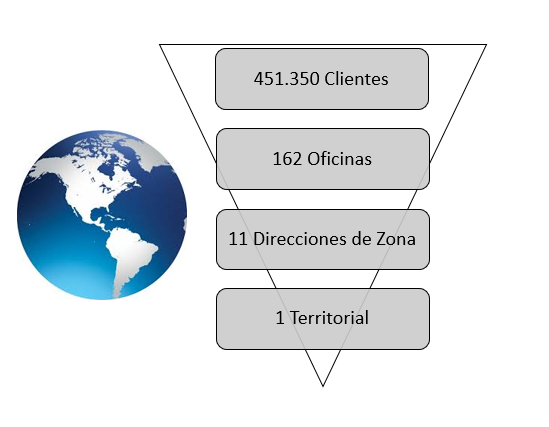

In [29]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/ESTRUCTURAPIRAMIDAL.png'),width = 400)

In [30]:
# Cargamos Librerias Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#### __Estructura Global__

Realizaremos un retrato piramidal de cara a entender cual es la estrutura de la entidad financiera y sobre la que descansa nuestra base de datos.

In [31]:
#  **** MAPA CONTEXTUAL **** Informacion Unidades de Negocio.
print('INFORMACION VARIABLES UNIDADES DE NEGOCIO')
print('-----------------------------------------')  
print('Numero DZs:      ',df['dz'].nunique())
print('Numero Oficinas: ', df['oficina'].nunique())
print('Numero Gestores: ', df['gestor'].nunique())
print('Numero Clientes: ', df['cliente'].nunique())
print('Esta carterizado:?')
print(df['esta_carterizado'].value_counts(normalize = True))

INFORMACION VARIABLES UNIDADES DE NEGOCIO
-----------------------------------------
Numero DZs:       11
Numero Oficinas:  162
Numero Gestores:  458
Numero Clientes:  451374
Esta carterizado:?
SI    0.904416
NO    0.095584
Name: esta_carterizado, dtype: float64


#### __Numero oficinas por cada Direccion de Zona__

<p style='text-align: justify;'>Informamos de inicio de cómo queda la estructura de negocio de este retrato piramidal.  Se trata de unidades de negocio por lo que no estarán presentes en nuestro modelo de clasificación.  Queremos clasificar a los clientes por su propensión al consumo y no por su ubicación territorial.
    
<p style='text-align: justify;'>Encontramos 11 Direcciones de Zona con 162 oficinas y 451.374 clientes.   Estos clientes están asesorados comercialmente por 458 Asesores Financieros.  El 90 % de los clientes pertenecen a una cartera de negocio. 

En general igualdad de oficinas por DZ.  


Numero de Oficinas por DZ:  162
dz
1     15
2     13
3     17
4     16
5     17
6     15
7     13
8     11
9     16
10    15
11    14
Name: oficina, dtype: int64


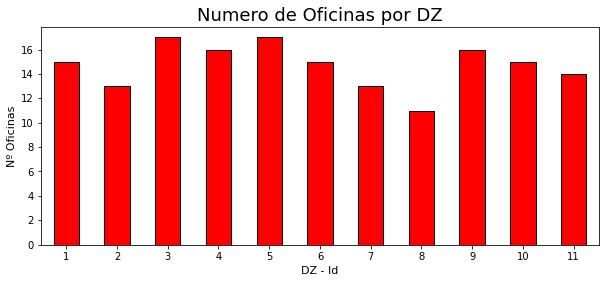

In [32]:
# Numero oficinas por cada Direccion de Zona
# El numero de oficinas / DZ depende de la ubicacion de las oficinas.

print('Numero de Oficinas por DZ: ',df.groupby('dz')['oficina'].nunique().sum())
print(df.groupby('dz')['oficina'].nunique())
numero_oficinas_por_dz = df.groupby('dz')['oficina'].nunique()
numero_oficinas_por_dz.plot(kind = 'bar', legend = '', grid = False, color = 'r', 
                                           rot = True, edgecolor = 'black',  linewidth=1, figsize = (10,4))
plt.title('Numero de Oficinas por DZ', fontsize = 18)
plt.xlabel('DZ - Id', fontsize = 11)
plt.ylabel('Nº Oficinas', fontsize = 11)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Numero de Oficinas por DZ.png', dpi=75,bbox_inches='tight')
plt.show()

#### __Numero Clientes por cada Direccion de Zona__

Total Numero Clientes por DZ:  451374


count       11.000000
mean     41034.000000
std       8051.037175
min      21690.000000
25%      38337.500000
50%      42198.000000
75%      46634.500000
max      51468.000000
Name: cliente, dtype: float64

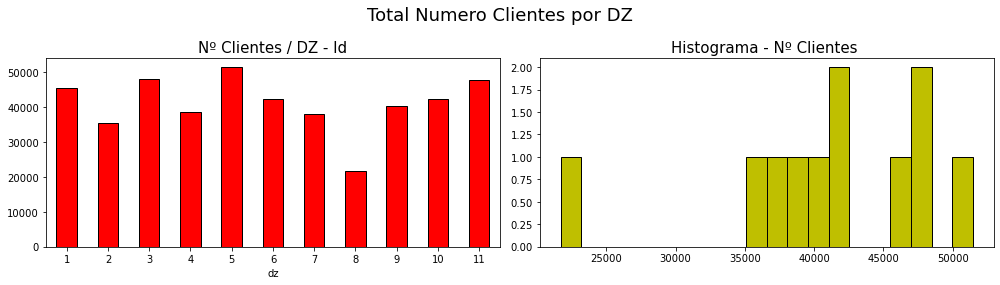

In [33]:
figure, axes = plt.subplots(1,2)
print('Total Numero Clientes por DZ: ', df['cliente'].nunique())

total_clients_per_dz = df.groupby('dz')['cliente'].nunique()


total_clients_per_dz.plot(ax = axes[0], kind = 'bar',legend = '',grid = False, color = 'r',
                            rot = True, edgecolor = 'black',linewidth = 1 , figsize = (14,4))


total_clients_per_dz.hist(grid = False, color = 'y', bins = 20, 
                                  edgecolor = 'black',linewidth = 1 , figsize = (14,4), 
                                  legend = '')

axes[0].set_title('Nº Clientes / DZ - Id', fontsize = 15)
axes[1].set_title('Histograma - Nº Clientes ', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Total Numero Clientes por DZ.png', dpi=75,bbox_inches='tight')
plt.suptitle('Total Numero Clientes por DZ',fontsize = 18)
figure.tight_layout()
total_clients_per_dz.describe()


#### __Clientes por oficina__

• Colectivo 451.000 Clientes.

• Grueso de oficinas entre 1500 y 3500 clientes 

• Oficinas con menos de 1500 clientes no suelen existir y de mas de 5000 son escasas.


Total Clientes por Oficina:  451374


count     162.000000
mean     2786.259259
std      1025.420335
min      1185.000000
25%      2000.500000
50%      2619.500000
75%      3357.000000
max      5755.000000
Name: cliente, dtype: float64

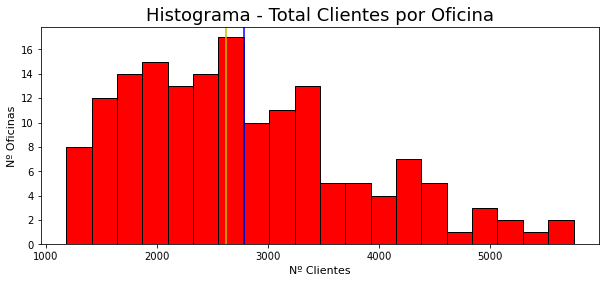

In [34]:
print('Total Clientes por Oficina: ', df['cliente'].nunique())
total_Clients_per_Office = df.groupby('oficina')['cliente'].nunique().sort_values(ascending = False)
total_Clients_per_Office.plot(kind = 'hist',legend = '', grid = False, color = 'r',
                            rot = True, edgecolor = 'black',linewidth = 1 , figsize = (10,4), bins = 20);

plt.axvline(total_Clients_per_Office.mean(), color='b')
plt.axvline(total_Clients_per_Office.median(), color='y')

plt.title('Histograma - Total Clientes por Oficina', fontsize = 18)
plt.xlabel('Nº Clientes', fontsize = 11)
plt.ylabel('Nº Oficinas', fontsize = 11)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Total Clientes por Oficina.png', dpi=75,bbox_inches='tight')
df.groupby('oficina')['cliente'].nunique().describe()

#### __Numero de Gestores por DZ__

•	Servicio Asesoramiento Especializado

•	Colectivo de 458 Empleados

•	No hay mucha descompensación entre DZs.  

•	Media de 48 Asesores – Gestores    *DZ8


Total Nº de Gestores:  458


count    11.000000
mean     45.818182
std       8.931049
min      25.000000
25%      41.500000
50%      48.000000
75%      52.500000
max      55.000000
Name: gestor, dtype: float64

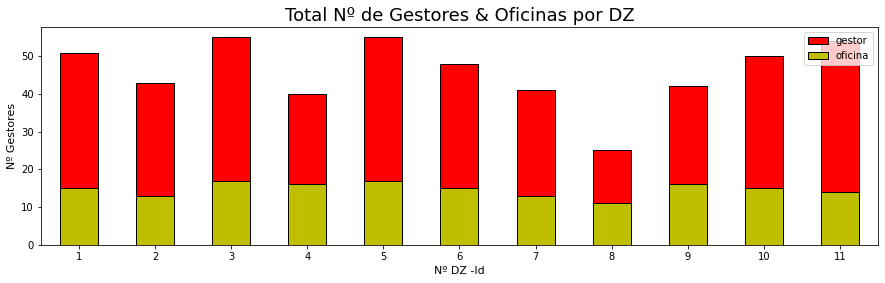

In [35]:
print('Total Nº de Gestores: ', df['gestor'].nunique())
figure, axes = plt.subplots(1,1)
consultants_per_of = df.groupby('dz')['oficina'].nunique()
consultants_per_dz = df.groupby('dz')['gestor'].nunique()
consultants_per_dz.plot( kind = 'bar',legend = 'Reverse',grid = False, color = 'r', 
                            rot = True, edgecolor = 'black',linewidth = 1)

consultants_per_of.plot(kind = 'bar',legend = 'Reverse',grid = False, color = 'y', 
                           rot = True, edgecolor = 'black',linewidth = 1, figsize = (15,4),
                          xlabel = 'Nº Direcciones de Zona - Nº Gestores');
plt.title('Total Nº de Gestores & Oficinas por DZ', fontsize = 18)
plt.xlabel('Nº DZ -Id', fontsize = 11)
plt.ylabel('Nº Gestores', fontsize = 11)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Total Nº de Gestores & Oficinas por DZ.png', dpi=75,bbox_inches='tight')
df.groupby('dz')['gestor'].nunique().describe()

- #### Bloque 2  Variable Edad 

#### __Edad de los clientes__

<p style='text-align: justify;'>Visualizamos mediante un Box Plot la variable edad de los clientes.  Esta visualización nos da la oportunidad de identificar la edad minina de los clientes, edad máxima, media, así como los cuartiles 25% y 75%.
<p style='text-align: justify;'>dicionalmente realizamos una segmentación de clientes por edad para ver en que rango de edad hay más clientes.
<p style='text-align: justify;'>Las gráficas nos dicen que la mayoría de clientes se encuentra en un rango de edad de 50 a 90 años.  Se trata de una base de datos con clientes de mediana y avanzada edad.

•	La edad mínima que reflejan los datos son 0 años.  (Valor incluido en estudio Nans)
    
•	La edad máxima son 118 años. 
    
•	La media de edad está en 58.2 años.

   

C:\Users\manue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

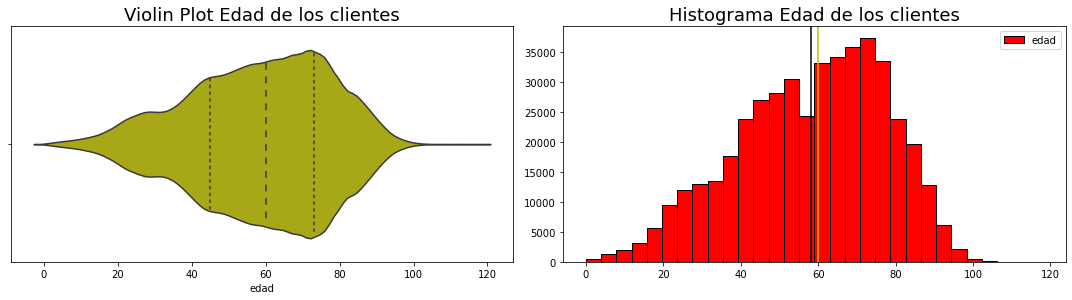

In [36]:
figure, axes = plt.subplots(1,2,figsize = (12,4))

variables_edad.hist(color = 'r', bins = 30, grid = False, edgecolor = 'black', 
                    legend = 'Reverse', linewidth = 1, figsize = (15,4));

sns.violinplot(variables_edad,ax = axes[0], color = 'y', inner="quartile")

plt.axvline(variables_edad.mean(), color='black')
plt.axvline(variables_edad.median(), color='y')
figure.tight_layout()

axes[0].set_title('Violin Plot Edad de los clientes', fontsize = 18)
axes[1].set_title('Histograma Edad de los clientes', fontsize = 18)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Edad de los clientes.png', dpi=75,bbox_inches='tight')


variables_edad.describe()

#### __Segmentacion de clientes por edades__

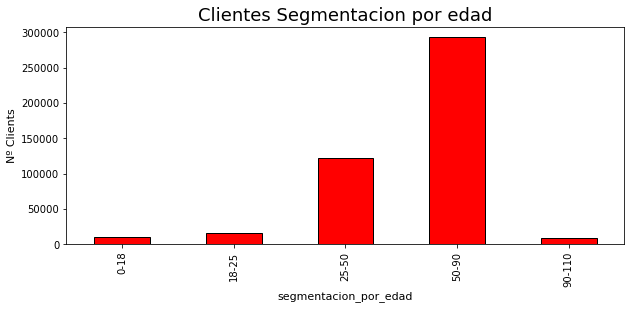

In [37]:
# Generamos una nueva variable de segmentacion de clientes por edades para ver los tramos de edad.
# Esta segmentacion sirve para una posible decision de eliminar de nuestro modelo a clientes de ciertos rangos.
# Clientes entre 0 y 20 años no es comun que dispongan de un seguro de hogar.
# Cliente > 90 años, dada su avanzada edad es habitual que sean los hijos quienes sean tomadores de los seguros.

df['segmentacion_por_edad'] = pd.cut(df.edad, bins = [0,18,25,50,90,110],
                     labels= ['0-18','18-25','25-50','50-90','90-110'])

segmentacion_por_edad = df['cliente'].groupby(df['segmentacion_por_edad']).count()

segmentacion_por_edad.plot(kind = 'bar', color = ('r'), grid = False, edgecolor = 'black', 
                           linewidth = 1, figsize = (10,4), fontsize = 10)
plt.title('Clientes Segmentacion por edad', fontsize = 18)
plt.xlabel('segmentacion_por_edad', fontsize = 11)
plt.ylabel('Nº Clients', fontsize = 11)
plt.savefig(ruta +'/Financial-Product-Sales-Forecast-Model/Images/EDA-Clienes segmentacion_por_edad.png', dpi=75,bbox_inches='tight')
plt.show()


#### __Conclusiones Bloque 2__

<p style='text-align: justify;'>    De cara a nuestro modelo, además de no resultar significativos por número total eliminaremos a los clientes entre los rangos de edad de 0 a 25 años y de 90 en adelante.  La realidad a la hora de contratar un seguro de hogar es que los menores y jóvenes hasta los 25 años no contratan un seguro porque sencillamente no tienen vivienda propia. 
<p style='text-align: justify;'>En cuanto a los clientes mayores de 90 años, dada su avanzada edad, normalmente son sus hijos los responsables de los seguros de hogar, por lo que vamos a eliminarlos del modelo.

- #### Bloque 3  Variables Ahorro - Financiacion
#### __Variables Ahorro Financiacion 'saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'__

<p style='text-align: justify;'>Dentro de este bloque estudiamos las variables saldo captación, saldo financiación , saldos en fondos de inversión y saldos en plantes de pensión .  
<p style='text-align: justify;'>Iniciamos el estudio de este bloque mediante la visualización de posibles correlaciones entre las propias variables por si pudiésemos eliminar alguna de ellas por alta correlación. 
<p style='text-align: justify;'>    La grafica de correlaciones muestra que no existe grandes relaciones por lo que, a falta del estudio de cada una de las variables de forma independiente, en principio se serán mantenidas todas ellas de cara al modelo de clasificación.


#### __Posibles Correlaciones entre las propias variables de ahorro financiacion__

#### __Variables Ahorro Financiacion 'saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'__


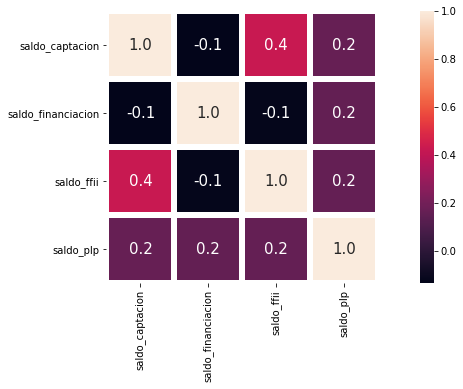

In [38]:
# No existen grandes correlaciones entre las propias variables.

import seaborn as sns
correlation_mat = variables_ahorro_financiacion.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,5)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':15},ax=ax)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Correlaciones Var_ahorro_fin.png', dpi=75,bbox_inches='tight')
plt.show()

#### __Saldos Captacion__

<p style='text-align: justify;'>Conseguimos entender cuál es la realidad de los ahorros de los clientes mediante la visualización por histogramas y Scatter Plot, y mediante descripción estadística de la variable. 
<p style='text-align: justify;'>Según arroja la función describe() la media de saldo en cuenta de los clientes es de menos de 5.000€. Si bien existen clientes con saldos importantes situándose el máximo en 5.2mm€ el 75% de los clientes no llega a los 6.500€ y los ahorros se distribuyen claramente entre los clientes a partir de 60 años hasta los 90.   
<p style='text-align: justify;'>Solo 215 clientes disponen de mas de 1mm€ en cuenta.

Nº Clientes con saldos en cuenta:  436942
Nº Clientes con saldos > 1mm€:  215


count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

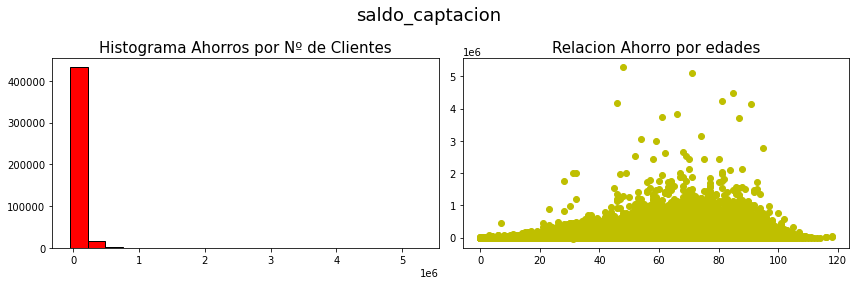

In [39]:
# Histograma arroja claramente que la mayoria de los clientes tiene saldos inferiores a los 100.000€
# Existen un numero pequeño de clientes cuyos saldos en cuenta ascienden a mas de 1mm€.
# La media de los saldos no llega a los 50.000€
# Colectivo dentro de una segmentacion de clase economica media.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clientes con saldos en cuenta: ', df[df['saldo_captacion'] > 0 ]['cliente'].count())
print('Nº Clientes con saldos > 1mm€: ', df[df['saldo_captacion'] > 1e6 ]['cliente'].count())

df['saldo_captacion'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1)
plt.scatter(df['edad'],df['saldo_captacion'],color = 'y');

axes[0].set_title('Histograma Ahorros por Nº de Clientes', fontsize = 15)
axes[1].set_title('Relacion Ahorro por edades', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Saldos Captacion', dpi=75,bbox_inches='tight')
plt.suptitle('saldo_captacion',fontsize = 18)

figure.tight_layout()
df['saldo_captacion'].describe()

#### __Saldos Financiacion__

<p style='text-align: justify;'>La mitad de los clientes de nuestra base de datos tienen prestamos, pero estos son de pequeño importe.   Solo el 10% de los clientes tienen prestamos superiores a 50.000€, cantidades que pueden dar a pensar que la financiación corresponde a préstamos hipotecarios de adquisición de vivienda.
<p style='text-align: justify;'>El préstamo medio es de 13.000€ seguramente prestamos destinados a consumos familiares, vehículos, reformas, etc. El rango de edad donde mas prestamos tienen son de 30 a 75 años, edades que casan con la realidad del rango de edad en los que se solicitan préstamos al consumo. Por último, vemos que hay clientes con deudas.
<p style='text-align: justify;'>Se trata de una variable importante que mantendremos en el modelo. Si bien daremos valor 0 a los clientes que tienen saldo negativo / deudas para no distorsionar.



Nº Clientes con Financiacions: 223894
Nº Clientes con Financiacion > 50.000€: 42860


count    4.513740e+05
mean     1.380668e+04
std      4.296438e+04
min     -4.900000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      6.841775e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

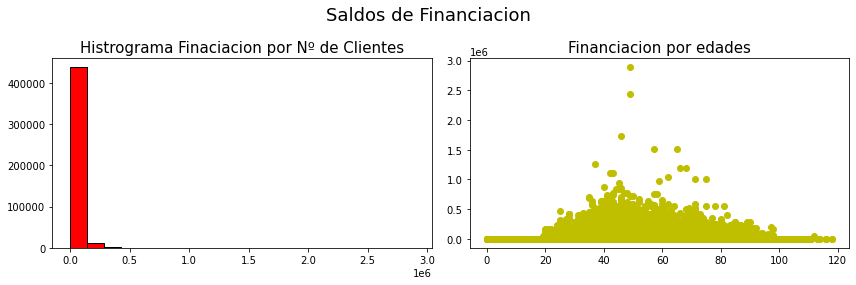

In [40]:
# Vemos de inicio que hay clientes con financiacion deudora (min = 4.900000e+03)
# Saldos medios de financiacion de 13.000€.  
# Colectivo con financiacion al consumo.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clientes con Financiacions:',df[df['saldo_financiacion'] > 1]['cliente'].count())
print('Nº Clientes con Financiacion > 50.000€:',df[df['saldo_financiacion'] > 50000]['cliente'].count())

df['saldo_financiacion'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_financiacion'],color = 'y');

axes[0].set_title('Histrograma Finaciacion por Nº de Clientes', fontsize = 15)
axes[1].set_title('Financiacion por edades', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Financiacion', dpi=75,bbox_inches='tight')
plt.suptitle('Saldos de Financiacion',fontsize = 18)

figure.tight_layout()
df['saldo_financiacion'].describe()

#### __Fondos de Inversion__

<p style='text-align: justify;'>Se trata de una variable que mide el nivel de ahorro de los clientes y también de cultura financiera.  No todos los clientes son susceptibles de tener este tipo de ahorro.  Bien por desconfianza o por desconocimiento de su funcionamiento.  
<p style='text-align: justify;'>Aquellos clientes que si disponen de Fondos de Inversión están dentro de un rango de edad de 50 a 90 años.  Con la descripción estadística vemos claramente que la mayoría del cliente no tienen fondos. La media se sitúa en 8.000€.
    
    

Nº Clientes con Fondos Inversion:  60932
Nº Clientes con Fondos Inversion > 50.000€ :  23479


count    4.513740e+05
mean     8.483663e+03
std      3.844671e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.130940e+06
Name: saldo_ffii, dtype: float64

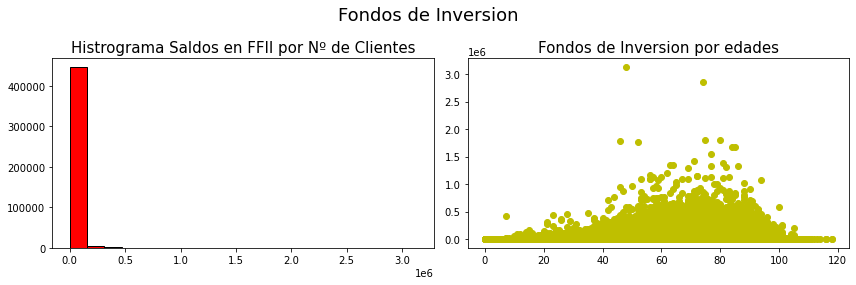

In [41]:
# Histograma arroja claramente que la mayoria de los clientes tiene saldos inferiores a los 100.000€
# Existen un numero pequeño de clientes cuyos saldos en cuenta ascienden a mas de 1mm€.
# La media de los saldos no llega a los 8.000€
# Metodo de ahorro no prioritario.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clientes con Fondos Inversion: ', df[df['saldo_ffii'] > 0]['cliente'].count())
print('Nº Clientes con Fondos Inversion > 50.000€ : ', df[df['saldo_ffii'] > 50000]['cliente'].count())

df['saldo_ffii'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_ffii'],color = 'y');

axes[0].set_title('Histrograma Saldos en FFII por Nº de Clientes', fontsize = 15)
axes[1].set_title('Fondos de Inversion por edades', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Fondos de Inversion', dpi=75,bbox_inches='tight')
plt.suptitle('Fondos de Inversion',fontsize = 18)

figure.tight_layout()
df['saldo_ffii'].describe()

#### __Planes de Pension__

<p style='text-align: justify;'> Producto dirigido a la jubilación.  Se trata de ahorrar durante la vida activa para cuando se llegue a la jubilación se pueda complementar la pensión que se recibirá de la seguridad social.  
<p style='text-align: justify;'>En la misma línea de los fondos de inversión,  se trata de un producto que no todo el mundo tiene a pesar de ser muy buena opción de ahorro aunque no la única.
<p style='text-align: justify;'>Los clientes que tienen planes de pensión se sitúan en rango de edad de 40 años hasta llegar al máximo con 65 años donde empieza a descender motivado por los rescates de los planes una vez jubilados los clientes. 

Nº Clientes sin Planes Pension 404808
Nº Clientes sin Planes Pension > 100.000€: 1262


count    451374.000000
mean       1728.478326
std       10780.622435
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      459937.460000
Name: saldo_plp, dtype: float64

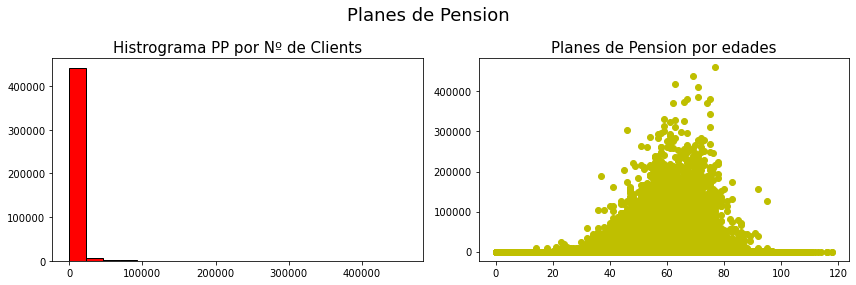

In [42]:
# Histograma arroja claramente que la mayoria de los clientes tiene saldos inferiores a los 100.000€
# Existen un numero pequeño de clientes cuyos saldos en cuenta ascienden a mas de 1mm€.
# La media de los saldos no llega a los 2.000€
# Metodo de prevision futuro no prioritario.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clientes sin Planes Pension', df[df['saldo_plp'] == 0]['cliente'].count())
print('Nº Clientes sin Planes Pension > 100.000€:', df[df['saldo_plp'] > 1e5]['cliente'].count())

df['saldo_plp'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_plp'],color = 'y');

axes[0].set_title('Histrograma PP por Nº de Clients', fontsize = 15)
axes[1].set_title('Planes de Pension por edades', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Planes de Pension', dpi=75,bbox_inches='tight')
plt.suptitle('Planes de Pension',fontsize = 18)

figure.tight_layout()
df['saldo_plp'].describe()

#### __Conclusiones Bloque 3__
    
      - Numero Total Clientes:  451374
      - Nº Clientes con saldos en cuenta:  436942
      - Nº Clientes con Financiacion: 223894
      - Nº Clientes sin Fondos Inversion:  390442
      - Nº Clientes sin Planes Pension: 404808

- En una primera visualizacion con los histogramas,  ya detectamos que en los 4 epigrafes la mayoria de los clientes tienden a saldos muy bajos.
- Los metodos de ahorro prevision y ahorro para la jubilacion no son los prioritarios de los clientes.
- En relacion a nuestro Tarhet, la realidad comercial es que el hecho de disponer saldos en __Fondos de Inversion o Planes de Pension__ no es una de las condiciones que lleven a los clientes a contratar o no un Seguro de Hogar. __Estas dos variables seran convertidas en variables categorias booleanas__. Los valores asignados seran 0 si no tiene y 1 si tiene. De esta  forma simplificaremos el estudio.  
- __Variable Captacion__.  Son valores reales. Solamente __modificaremos los negativos y les damos valor de la media__.
- En cuanto a la __financiacion__ vemos que hay un 50% de clientes que si disponen de financiacon. __Mantenemos la variable__ que puede ser util para el modelo. Clientes con saldos deudores les darmeos valor 0€

- #### Bloque 4 Variables de Servicios

#### __Domiciliacion de ingresos y recibos, tarjetas de credito y tenencia de App Internet__
Visualizamos cada una de las variables en dos aspectos; Histograma y en forma de Scatter combinadas con la variable Edad.

<p style='text-align: justify;'> La mayor correlación que existe 0.5 es de tarjeta de crédito con tarjeta revolvíng.  Se trata de dos tarjetas de crédito, pero de distinto tipo de uso. La primera el tipo de pago es 100% a fin de mes, mientras que la tarjeta revolving es de pago fraccionado mediante cuota definida fija.
<p style='text-align: justify;'> A pesar de esta correlación del 0.5 ambas tarjetas serán mantenidas en nuestro modelo ya que se trata claramente de dos realidades distintas.


#### __Posibles Correlaciones entre las propias variables de servicio__

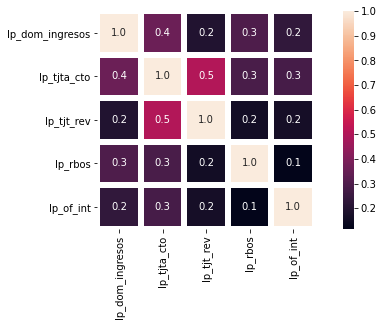

In [43]:
# Salvo en tarjetas de credito / revolvin no existen grandes correlaciones entre las propias variables.
correlation_mat = variables_servicio.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,4)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Correlaciones variables_servicio.png', dpi=75,bbox_inches='tight')
plt.show()

#### __Domiciliacion de Nomina__

<p style='text-align: justify;'> Variable muy importante. Quizás el servicio más demandado por una entidad financiera.  La domiciliación de nómina hace referencia a la nómina del trabajo y a la nómina por pensión. 
<p style='text-align: justify;'>El hecho de tener la nomina domiciliada en un banco supone una serie de beneficios mutuos para consumidor y entidad.
<p style='text-align: justify;'>El consumidor puede obtener mejores precios de préstamos,  menos comisiones y mejores primas en seguros.  Por otro lado,  la entidad financiera a pesar de cobrar menos comisión a este tipo de clientes se beneficia en la propia comisión generada por la comercialización de los seguros y de servicios asociados que pueden conllevar.. 
<p style='text-align: justify;'>Tenemos a un amplísimo porcentaje de clientes que tienen la nomina domiciliada y entre todo tipo de segmento de edad.  Si bien se agudiza en edades de mas de 25 años manteniéndose hasta la propia jubilación con la domiciliación de la pensión.


% Clientes con Ingresos 0.71
Empty DataFrame
Columns: [(lp_dom_ingresos, count), (lp_dom_ingresos, sum)]
Index: []


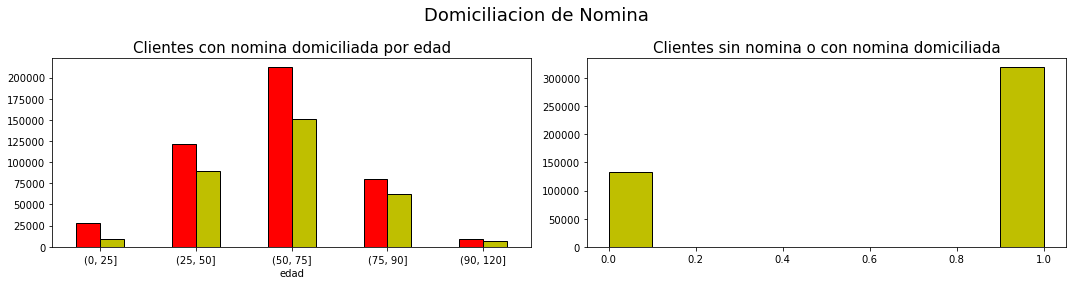

In [44]:
# Mayoria de los clientes con nomina o pension domiciliada entre 25 y 90 años.
# Buen porcentaje de clientes con domiciliacion de ingresos.

figure, axes = plt.subplots(1,2)
print ('% Clientes con Ingresos', df['lp_dom_ingresos'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_dom_ingresos']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_dom_ingresos']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_dom_ingresos'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con nomina domiciliada por edad', fontsize = 15)
axes[1].set_title('Clientes sin nomina o con nomina domiciliada', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Domiciliacion de Nomina', dpi=75,bbox_inches='tight')
plt.suptitle('Domiciliacion de Nomina',fontsize = 18)
figure.tight_layout()


#### __Domiciliacion de Recibos__

<p style='text-align: justify;'> Este tipo de servicio suele ir de la mano a la domiciliación de la nomina . Esto se ve en las siguientes graficas que son muy parecidas a las del servicio nómina. 
<p style='text-align: justify;'> El 87% de los clientes tienen el servicio. Por supuesto este tipo de servicio también deja importantes beneficios a un banco ya que para tener domiciliado un recibo es necesario disponer de saldo en cuenta y el saldo en cuenta es sencillamente margen de beneficio para la entidad

% Clientes con recibos domiciliados 0.87
          lp_rbos        
            count     sum
edad                     
(0, 25]     27661    9382
(25, 50]   121987  103084
(50, 75]   212315  196207
(75, 90]    80580   76691
(90, 120]    8818    8169


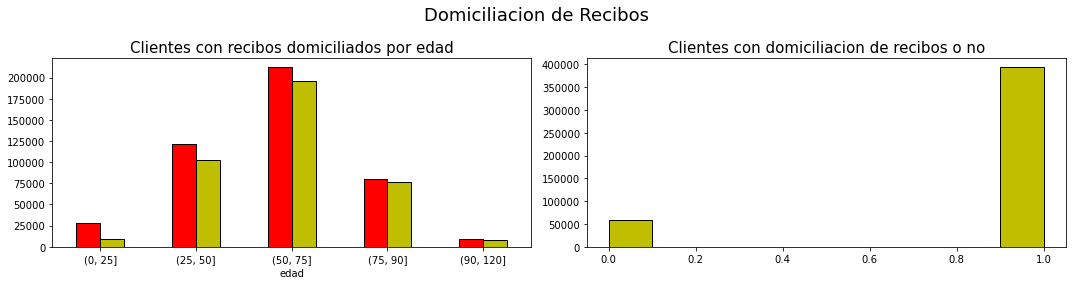

In [45]:
# Mayoria clientes con servicio domiciliacion de recibos.
# Alto Porcetaje de clientes con  el servicio.
# Acumulado en Clientes entre 25 y 90 años.

figure, axes = plt.subplots(1,2)
print ('% Clientes con recibos domiciliados',df['lp_rbos'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_rbos']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_rbos']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_rbos'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con recibos domiciliados por edad', fontsize = 15)
axes[1].set_title('Clientes con domiciliacion de recibos o no', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Domiciliacion de Recibos', dpi=75,bbox_inches='tight')
plt.suptitle('Domiciliacion de Recibos',fontsize = 18)
figure.tight_layout()


#### __Internet App__

<p style='text-align: justify;'> Servicio destinado a la consulta y operativa 24 horas de las posiciones de un cliente.  A través de este servicio es posible realizar compras, transacciones y consultas sin que la oficina del banco este abierta.  
<p style='text-align: justify;'>Es un servicio que tienen la mayoría de los clientes,  el 77% en este caso. 
<p style='text-align: justify;'>Los beneficios de este servicio son para ambos lados.  Cliente puede realizar en cualquier momento una operación y la entidad financiera ahorra costes de estructura y esfuerzos logísticos. 

% Clientes con App Internet 0.77
          lp_of_int        
              count     sum
edad                       
(0, 25]       27661   18593
(25, 50]     121987  112287
(50, 75]     212315  164809
(75, 90]      80580   49159
(90, 120]      8818    4138


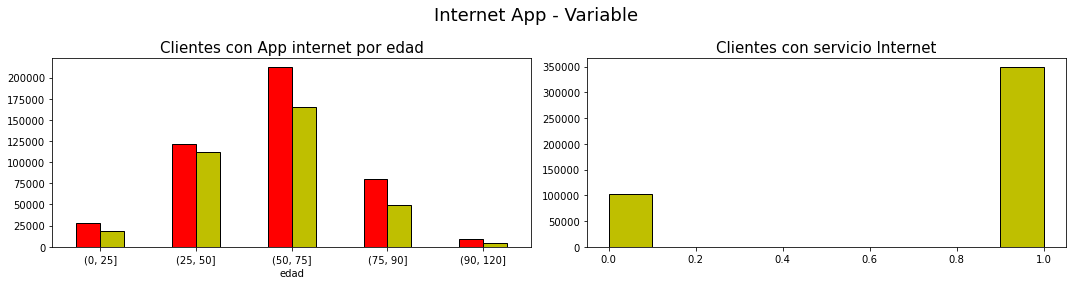

In [46]:
# Servicio de acceso via APP a posiciones de los clientes.
# Alto Porcetaje de clientes con  el servicio.
# Acumulado en Clientes entre 25 y 75 años.

figure, axes = plt.subplots(1,2)
print ('% Clientes con App Internet',df['lp_of_int'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_of_int']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_of_int']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_of_int'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con App internet por edad', fontsize = 15)
axes[1].set_title('Clientes con servicio Internet', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Internet App', dpi=75,bbox_inches='tight')
plt.suptitle('Internet App - Variable',fontsize = 18)
figure.tight_layout()


#### __Tarjeta de Credito__

<p style='text-align: justify;'> Servicio que mantienen el 55% de los clientes en el caso de Tjta e Crédito pago 100% y el 24 % de los clientes en el caso de Revolving

% Clientes con Tarjeta de Credito 0.55
          lp_tjta_cto        
                count     sum
edad                         
(0, 25]         27661    2864
(25, 50]       121987   64390
(50, 75]       212315  137133
(75, 90]        80580   41694
(90, 120]        8818    2391


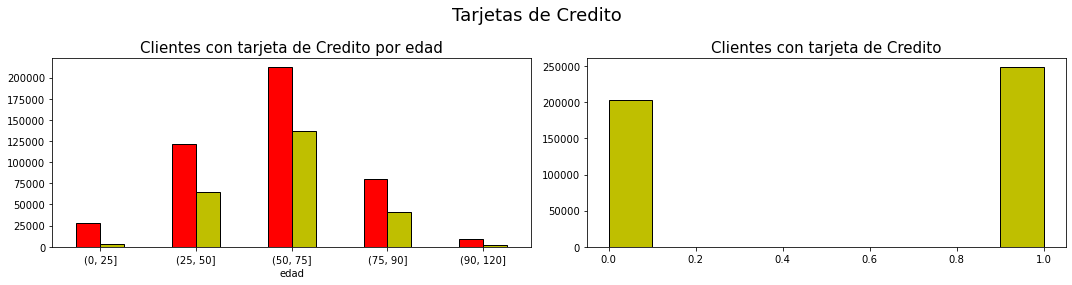

In [47]:
# 'Solo el 50% de los clientes disponen de Tjta de Credito'
# Medio de pago poco necesitado por este colectivo de clientes.

figure, axes = plt.subplots(1,2)
print ('% Clientes con Tarjeta de Credito', df['lp_tjta_cto'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_tjta_cto']].agg(['count','sum']))
segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(segmentacion_por_edad)[['lp_tjta_cto']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_tjta_cto'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con tarjeta de Credito por edad', fontsize = 15)
axes[1].set_title('Clientes con tarjeta de Credito', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Tarjetas de Credito', dpi=75,bbox_inches='tight')
plt.suptitle('Tarjetas de Credito',fontsize = 18)

figure.tight_layout()


#### __Tarjeta Credito Revolving__

% Clients with Revolving Credit Card 0.24
          lp_tjt_rev       
               count    sum
edad                       
(0, 25]        27661    994
(25, 50]      121987  26939
(50, 75]      212315  59209
(75, 90]       80580  19130
(90, 120]       8818    964


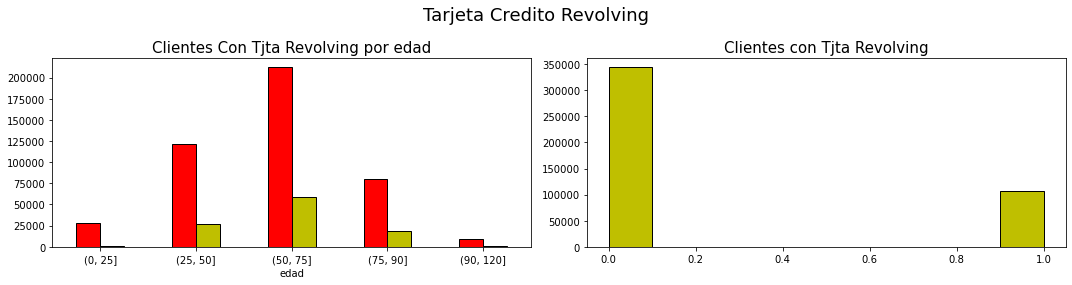

In [48]:
# Tarjeta muy parecida a la Tarjeta de Credito. 
# 'Solo el 25% de los clientes disponen de Tjta de Credito'
# Medio de pago poco necesitado por este colectivo de clientes.

figure, axes = plt.subplots(1,2)
print ('% Clients with Revolving Credit Card', df['lp_tjt_rev'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_tjt_rev']].agg(['count','sum']))
segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(segmentacion_por_edad)[['lp_tjt_rev']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_tjt_rev'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes Con Tjta Revolving por edad', fontsize = 15)
axes[1].set_title('Clientes con Tjta Revolving', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Tarjeta Revol', dpi=75,bbox_inches='tight')
plt.suptitle('Tarjeta Credito Revolving',fontsize = 18)
figure.tight_layout()


#### __Conclusiones BLoque 4.__

INFORMACION VARIABLES SERVICIOS

    - Clientes con Ingresos 0.71%
    - Clientes con Tjta Cto 0.55%
    - Clientes con Tjta Rev 0.24%
    - Clientes con Rbos domiciliados 0.87%
    - Clientes con Servicio Internet 0.77%
    
<p style='text-align: justify;'> Podemos asegurar que el data set esta formado por clientes con media - alta vinculación con la entidad financiera.  Aun asi, se evidencia  un amplio potencial de desarrollo comercial.   
<p style='text-align: justify;'> Las cinco variables que componen este bloque van casi de la mano tanto en tenencia como en el segmento de edad por utilización.
<p style='text-align: justify;'> Son clientes entre 25 y 75 años los que mas utilizan estos servicios. 
<p style='text-align: justify;'>Los servicios mas importantes Domiciliacion de Ingresos, recibos e internet acumulan buenos % de contratacion.   
<p style='text-align: justify;'> Todas las variables serán mantenidas para el modelo ya que consideramos que son útiles para estimar si el cliente puede contratar el seguro de hogar.



- #### Bloque 5 Variables de Seguros

Visualizamos cada una de las variables en dos aspectos; Histograma y  combinadas con la variable Edad para ver cuantos clientes dentro de cada uno de los segmentos de edad, tienen seguros.


#### __Seguros de Hogar - Vida - Accidentes - Auto - Salud__

<p style='text-align: justify;'> Comprobaremos como estos seguros que atienden a contingencias de vida, accidentes y salud no tienen una buena penetración en los clientes.
<p style='text-align: justify;'>El seguro más contratado por los clientes es el seguro de vida y solo se trata de un 8%.   
<p style='text-align: justify;'>Los porcentajes de tenencia de los otros seguros descienden hasta sencillamente el 0% en el caso de Salud. 
<p style='text-align: justify;'>Anteriormente en el bloque de servicios hemos comentado como el hecho de tener nómina y recibos domiciliados puede ser una ventaja para los clientes por ahorrarse y beneficiarse de bajadas de prima en seguros.  Estos datos reflejan el altísimo potencial comercial y de mejora en este segmento.  Se trata de una oportunidad importante de generación de comisiones que no hay que dejar pasar.   
<p style='text-align: justify;'> Estos datos cruzados con el servicio de recibos pueden ser importante ya que es posible detectar clientes con recibos de seguros en otras aseguradoras. Esto es una verdadera oportunidad comercial ya que la realidad es que en cualquier casa o familia lo normal es que haya uno o dos vehículos, el cabeza de familia tenga un seguro de vida o la familia tenga un seguro de salud.
<p style='text-align: justify;'>Este porcentaje tan bajo de posesión de seguros indica que probablemente los tengan en otra entidad financiera o compañía de seguros.  

#### __Posibles Correlaciones entre las propias variables de seguros__

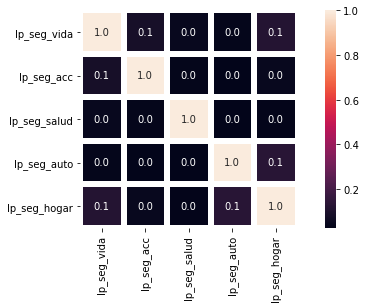

In [49]:
# Nula correlaciones entre las propias variables.

correlation_mat = variables_seguros.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,4)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Correlaciones Seguros de riesgo', dpi=75,bbox_inches='tight')
plt.show()

 __Seguros de Vida__

<p style='text-align: justify;'>

% Clientes con seguro de vidae 0.08
          lp_seg_vida       
                count    sum
edad                        
(0, 25]         27661    967
(25, 50]       121987  24373
(50, 75]       212315  12515
(75, 90]        80580      1
(90, 120]        8818      0


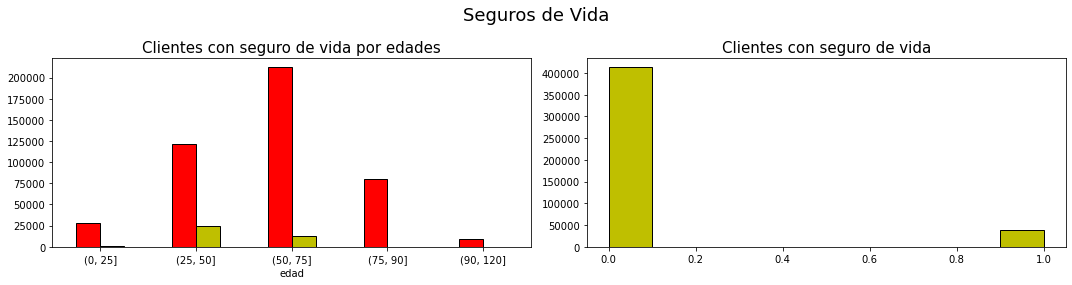

In [50]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clientes con seguro de vidae',df['lp_seg_vida'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_seg_vida']].agg(['count','sum']))
segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(segmentacion_por_edad)[['lp_seg_vida']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (12,4))

df['lp_seg_vida'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con seguro de vida por edades', fontsize = 15)
axes[1].set_title('Clientes con seguro de vida', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Seguro de Vida', dpi=75,bbox_inches='tight')
plt.suptitle('Seguros de Vida',fontsize = 18)
figure.tight_layout()

__Seguros de Accidentes__

% Clientes con Seguro de Accidentes 0.02
          lp_seg_acc      
               count   sum
edad                      
(0, 25]        27661    86
(25, 50]      121987  2867
(50, 75]      212315  6035
(75, 90]       80580    38
(90, 120]       8818     0


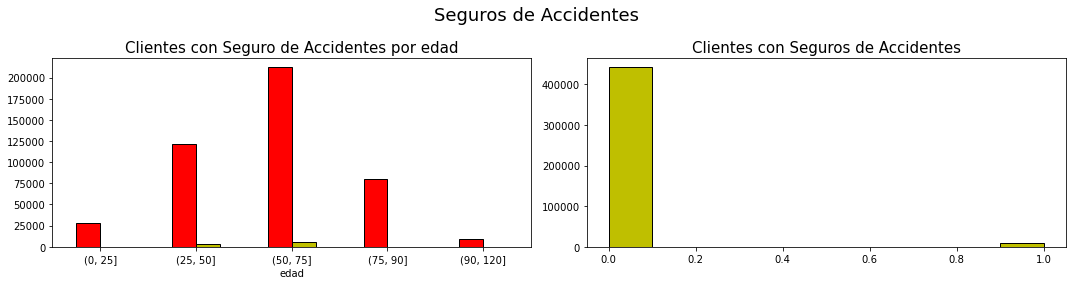

In [51]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clientes con Seguro de Accidentes',df['lp_seg_acc'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_seg_acc']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_acc']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_acc'].hist(ax = axes[1],figsize = (15,4), color = 'y',edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con Seguro de Accidentes por edad', fontsize = 15)
axes[1].set_title('Clientes con Seguros de Accidentes', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Seguros Accidentes', dpi=75,bbox_inches='tight')
plt.suptitle('Seguros de Accidentes',fontsize = 18)
figure.tight_layout()

 __Seguros de Salud__

% Clientes con Seguro de Salud  0.0
          lp_seg_salud      
                 count   sum
edad                        
(0, 25]          27661    53
(25, 50]        121987   793
(50, 75]        212315  1003
(75, 90]         80580    75
(90, 120]         8818     0


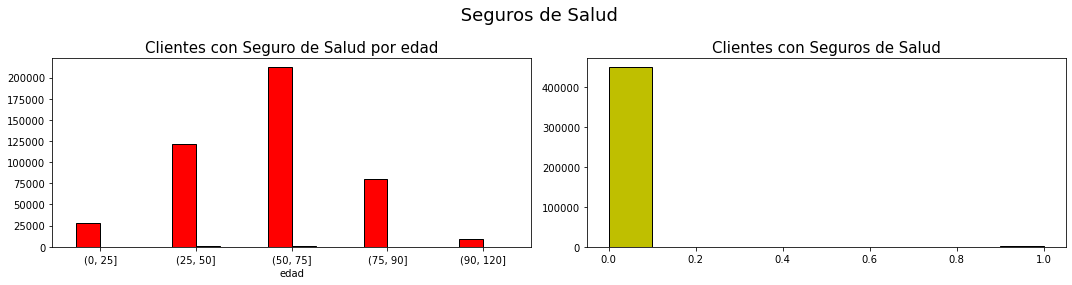

In [52]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clientes con Seguro de Salud ',df['lp_seg_salud'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_seg_salud']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_salud']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_salud'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con Seguro de Salud por edad', fontsize = 15)
axes[1].set_title('Clientes con Seguros de Salud', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA- Seguros de Salud', dpi=75,bbox_inches='tight')
plt.suptitle(' Seguros de Salud',fontsize = 18)
figure.tight_layout()

#### __Seguro de Coche__

% Clients with Car insurance 0.01
          lp_seg_auto      
                count   sum
edad                       
(0, 25]         27661     9
(25, 50]       121987  1482
(50, 75]       212315  3762
(75, 90]        80580   974
(90, 120]        8818     5


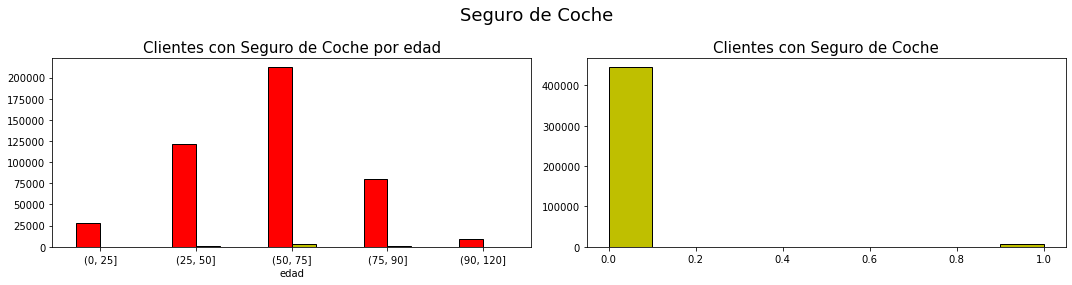

In [53]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clients with Car insurance',df['lp_seg_auto'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_seg_auto']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_auto']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_auto'].hist(ax = axes[1],figsize = (15,4), color = 'y',edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con Seguro de Coche por edad', fontsize = 15)
axes[1].set_title('Clientes con Seguro de Coche', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Seguro de Coche', dpi=75,bbox_inches='tight')
plt.suptitle('Seguro de Coche',fontsize = 18)
figure.tight_layout()

#### __ESTUDIO DEL TARGET __Seguro_Hogar____

__Estudiamos nuestro Target__

- Que estructura tiene el Target 
- Son importantes todas las variables 
- Como se relaciona con el resto de variables
- Podemos descartar alguna variable de cara al modelo ?

In [54]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Memory/df_cleanned.csv')

#### Estructura de Target

In [55]:
# Variable Binaria.  1 Tiene Seguro - 0 No tiene Seguro
df['lp_seg_hogar'].unique()

array([1, 0], dtype=int64)

% Clientes con Seguro Hogar 0.13 --TARGET
          lp_seg_hogar       
                 count    sum
edad                         
(0, 25]          27661     78
(25, 50]        121987  15337
(50, 75]        212315  27874
(75, 90]         80580  14217
(90, 120]         8818   1305


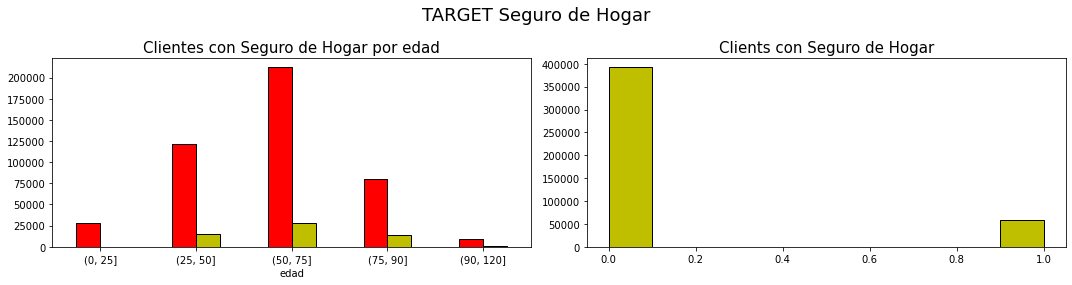

In [56]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clientes con Seguro Hogar',df['lp_seg_hogar'].value_counts(normalize = True)[1].round(2), '--TARGET')
print(df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_hogar'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con Seguro de Hogar por edad', fontsize = 15)
axes[1].set_title('Clients con Seguro de Hogar', fontsize = 15)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/images/EDA-Seguro de Hogar', dpi=75,bbox_inches='tight')
plt.suptitle('TARGET Seguro de Hogar',fontsize = 18)
figure.tight_layout()

#### __Correlacion Seguro de hogar con todas las variables__

lp_seg_hogar          1.000000
lp_dom_ingresos       0.177929
lp_rbos               0.133464
lp_seg_auto           0.132036
saldo_captacion       0.127449
saldo_financiacion    0.123231
lp_seg_vida           0.118517
saldo_plp             0.115034
lp_tjt_rev            0.106714
edad                  0.087744
lp_of_int             0.082749
saldo_ffii            0.075671
lp_tjta_cto           0.070634
lp_seg_acc            0.048611
lp_seg_salud          0.031651
gestor                0.007628
dz                   -0.032331
oficina              -0.033456
cliente              -0.039775
codigo_cartera       -0.080364
Name: lp_seg_hogar, dtype: float64


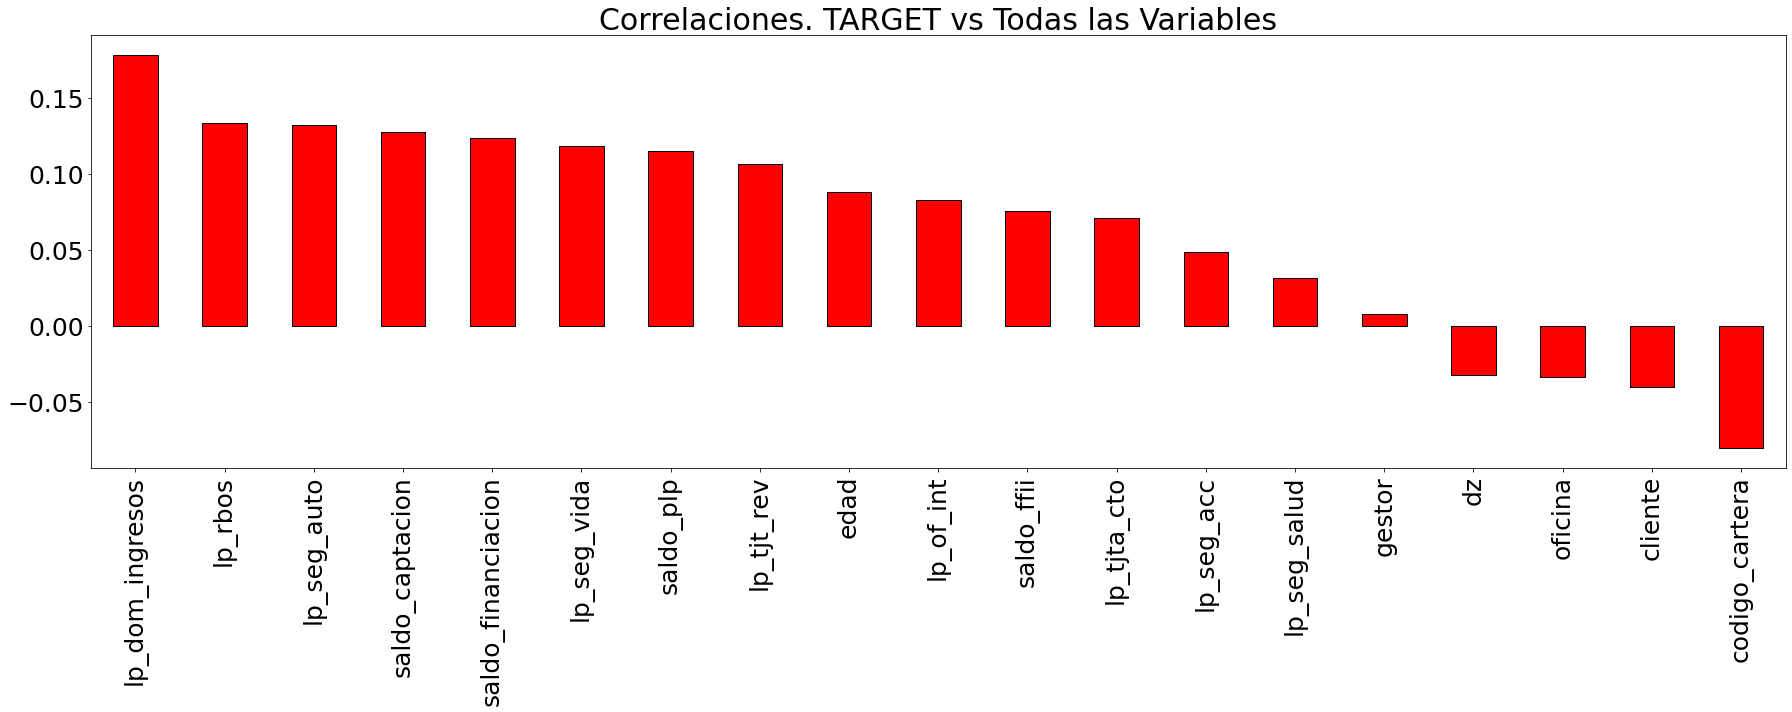

In [57]:
correlation_mat = df.corr(method = 'spearman')
corr_pairs = correlation_mat['lp_seg_hogar'].sort_values(ascending = False)
print(corr_pairs)
corr_pairs[1:].plot(kind ='bar',grid = False, color = 'r',edgecolor = 'black', linewidth=1,
                             rot = 90, figsize = (25,10), fontsize = 25)

plt.title('Correlaciones. TARGET vs Todas las Variables', fontsize = 30)

plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Correlationes TARGET vs Todas.png', dpi=75,bbox_inches='tight')

plt.tight_layout()
plt.show()

#### __Desbalanceo del Target__

Seguro de Hogar
% Clientes con Seguro de Hogar 0.13 --TARGET


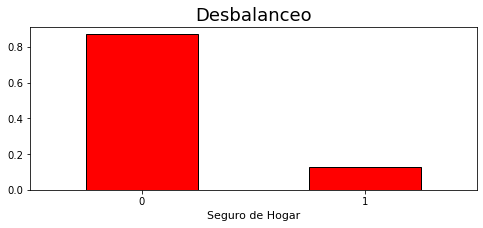

In [58]:
# Ploteamos el desbalanceo de la variable Target para una mejor visualizacion
# Vemos % y numero de clientes
# Target claramente desbalanceado. En nuestro modelo se debera tener en cuenta.

seguro_hogar = pd.value_counts(df['lp_seg_hogar'], sort = True, normalize = True)
print ('Seguro de Hogar')
seguro_hogar.plot(kind = 'bar', rot = 0, color = 'r' ,edgecolor = 'black', linewidth=1, figsize = (8,3))
print('% Clientes con Seguro de Hogar',df['lp_seg_hogar'].value_counts(normalize = True)[1].round(2), '--TARGET')

plt.title('Desbalanceo', fontsize = 18)
plt.xlabel('Seguro de Hogar',fontsize = 11)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-TARGET Desbalanceo.png', dpi=75,bbox_inches='tight')
plt.show()


### __Clientes con Seguro de Hogar por DZ__

Total Clientes con Seguro de Hogar
0    392563
1     58811
Name: lp_seg_hogar, dtype: int64


count      11.000000
mean     5346.454545
std      1523.625568
min      2274.000000
25%      4436.000000
50%      5957.000000
75%      6350.000000
max      7233.000000
Name: lp_seg_hogar, dtype: float64

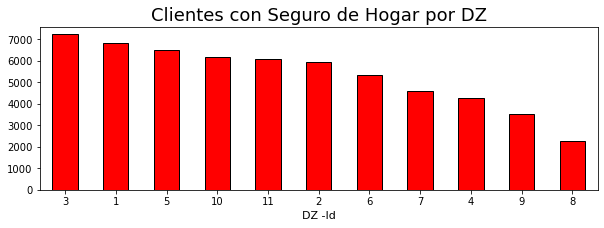

In [59]:
seguro_hogar_por_dz= df.groupby('dz')['lp_seg_hogar'].sum().sort_values(ascending = False)
seguro_hogar_por_dz.plot(kind ='bar',legend = '',grid = False, color = 'r',
                             rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,3))

print ('Total Clientes con Seguro de Hogar')
print (pd.value_counts(df['lp_seg_hogar']))

plt.title('Clientes con Seguro de Hogar por DZ', fontsize = 18)
plt.xlabel('DZ -Id',fontsize = 11)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Clientes con Seguro de Hogar por DZ.png', dpi=75,bbox_inches='tight')

seguro_hogar_por_dz.describe()

#### __Clientes con Seguro de Hogar segun las edades__

          lp_seg_hogar       
                 count    sum
edad                         
(0, 25]          27661     78
(25, 50]        121987  15337
(50, 75]        212315  27874
(75, 90]         80580  14217
(90, 120]         8818   1305


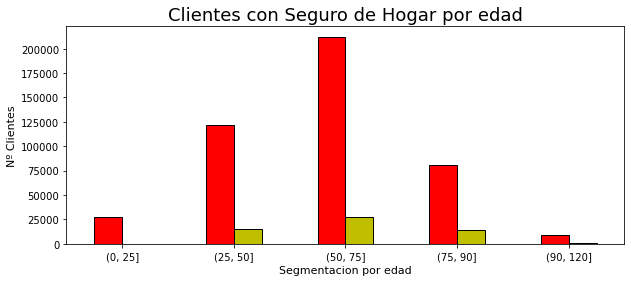

In [60]:
## Count refleja el Numero total de clientes en el segmento edad
# Sum refleja Numero de clientes con Seguro de Hogar
# En el modelo eliminamos clientes de 0-25 añios y >  90 años por no tener representacion en el seguro de hogar.

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
print(df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']))

df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']).plot(kind ='bar',legend = '',
                     grid = False, color = ('r','y'), rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,4))

plt.title('Clientes con Seguro de Hogar por edad', fontsize = 18)
plt.ylabel('Nº Clientes',fontsize = 11)
plt.xlabel('Segmentacion por edad',fontsize = 11)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Clientes con Seguro de Hogar por edad.png', dpi=75,bbox_inches='tight')
plt.show()


#### __Clientes segun cartera con seguro de hogar__

tipo_gestor              lp_seg_hogar
ASESOR FINANCIERO        0               349347
                         1                54493
SIN GESTOR               0                39209
                         1                 3935
SUBDIRECCIÓN DE OFICINA  0                 4007
                         1                  383
Name: cliente, dtype: int64


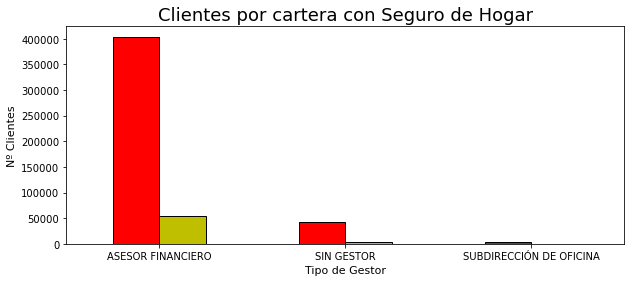

In [61]:
seguro_de_hogar_por_tipo_gestor = df.groupby('tipo_gestor')['lp_seg_hogar'].agg(['count','sum'])
print(df.groupby(['tipo_gestor', 'lp_seg_hogar'])['cliente'].nunique())
seguro_de_hogar_por_tipo_gestor.plot(kind ='bar',legend = '',grid = False, 
                                     color = ('r','y'), rot = 0, edgecolor = 'black', 
                                     linewidth=1, figsize = (10,4))

plt.title('Clientes por cartera con Seguro de Hogar', fontsize = 18)
plt.ylabel('Nº Clientes',fontsize = 11)
plt.xlabel('Tipo de Gestor',fontsize = 11)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Clientes por cartera con Seguro de Hogar.png', dpi=75,bbox_inches='tight')
plt.show()

#### __Clientes con nomina y seguro de hogar__

lp_dom_ingresos  lp_seg_hogar
0                0               127275
                 1                 4921
1                0               265288
                 1                53890
Name: lp_seg_hogar, dtype: int64


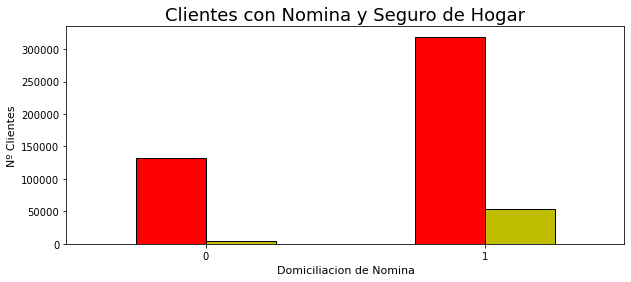

In [62]:
print(df.groupby('lp_dom_ingresos')['lp_seg_hogar'].value_counts())
df.groupby('lp_dom_ingresos')['lp_seg_hogar'].agg(['count','sum']).plot(kind ='bar',legend = '',
                     grid = False, color = ('r','y'), rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,4))

plt.title('Clientes con Nomina y Seguro de Hogar', fontsize = 18)
plt.ylabel('Nº Clientes',fontsize = 11)
plt.xlabel('Domiciliacion de Nomina',fontsize = 11)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Clientes con Nomina y Seguro de Hogar.png', dpi=75,bbox_inches='tight')
plt.show()

__Conclusiones Bloque 5.__



    - % Clientes con Seguro Vida 0.08
    - % Clientes con Seguro Accidentes 0.02
    - % Clientes con Seguro Salud 0.0
    - % Clientes con Seguro Auto 0.01
    - % Clientes con Seguro Hogar 0.13 --TARGET

<p style='text-align: justify;'> Vemos como la mayoria de los clientes no tienen Seguros contratados.
<p style='text-align: justify;'>Se trata de una verdadera oportunidad comercial ya que la realidad es que en cualquier casa o familia  lo normal es que haya uno o dos vehiculos, el/la cabeza de familiar disponga de un seguro de vida o se disponga a nivel familiar de un seguro de salud.  Este bajisimo porcentaje de tenecia de seguros indica que seguramente los tengan en otra entidad financiera o aseguradora. 
<p style='text-align: justify;'>Todos los seguros seran utilizados dentro del modelo.


- ####  Bloque 6 Variables Segmentacion


__Carterizacion de los clientes - recorrido comercial - Segmentacion Internet__

<p style='text-align: justify;'>Identificamos distribución de los clientes por segmentación
<p style='text-align: justify;'>Estas variables hacen referencia a distintos ámbitos en los que un cliente puede estar segmentado.  El 89% de los clientes están carterizados y asignado a un asesor financiero, aunque también hay clientes asignados a otras figuras como el subdirector.  
<p style='text-align: justify;'>Una variable importante es el segmento de recorrido. Nos indica que el 70% de los clientes tiene recorrido comercial.  (No hace más que confirmar lo visto hasta ahora.)
<p style='text-align: justify;'>Camino digital y Digital 3 Meses.  Otras variables importantes que reflejan la poca utilización del servicio internet .  El hecho de no utilizar este servicio esta asociado a la edad de los clientes.  Además de ser un servicio que no tienen muchos clientes el segmento de edad donde mas se utiliza es de 25 a 50.  Clara evidencia de la realidad tecnológica y de la falta de transformación y adaptación digital de los clientes de mediana y avanzada edad.


In [63]:
print('VARIABLES DE SEGMENTACION')
print('====================================')
for variable in variables_segmentacion:
    print(variable.upper(),':::')
    print(df[variable].value_counts(normalize = True))
    print('------------------------------------')

VARIABLES DE SEGMENTACION
ESTA_CARTERIZADO :::
SI    0.904416
NO    0.095584
Name: esta_carterizado, dtype: float64
------------------------------------
CLIENTE_BBP :::
NO    1.0
Name: cliente_bbp, dtype: float64
------------------------------------
TIPO_GESTOR :::
ASESOR FINANCIERO          0.894690
SIN GESTOR                 0.095584
SUBDIRECCIÓN DE OFICINA    0.009726
Name: tipo_gestor, dtype: float64
------------------------------------
CARTERA_PATRON :::
ASESORAMIENTO FINANCIERO    0.697767
TUTELA                      0.206649
SIN CARTERA                 0.095584
Name: cartera_patron, dtype: float64
------------------------------------
MARCA_BP :::
NO    0.720633
SI    0.279367
Name: marca_bp, dtype: float64
------------------------------------
MARCA_CCTE :::
AF           0.612485
SIN MARCA    0.270126
CCTE         0.117388
Name: marca_ccte, dtype: float64
------------------------------------
SEG_VALOR :::
ALTO     0.552963
MEDIO    0.298890
BAJO     0.148148
Name: seg_valor, dtyp

__Conclusiones Bloque 6__

<p style='text-align: justify;'> 90 % Clientes carterizados - Eliminamos del modelo
<p style='text-align: justify;'>Ningun cliente BBP - Eliminamos del modelo
<p style='text-align: justify;'>Resto de variables mantenemos y transformaremos con Label Encoder a variable numerica para poder utilizarlos en nuestro modelo.

- - -
- - -

## 4.8 Importancia de las Variables

<p style='text-align: justify;'>Estudiamos la importancia de las variables utilizando un modelo de Random Forest y una matriz de correlaciones. 
<p style='text-align: justify;'>Con este estudio pretendemos revelar que importancia tiene cada una de las variables dentro de nuestro data set.  Los datos revelados son los siguientes: 
<p style='text-align: justify;'>En cuanto a la matriz de correlaciones hemos utilizado la tabla de correlación de Spearman, cuyo resultado arroja correlaciones más altas que los demás métodos.
<p style='text-align: justify;'>La correlación entre las variables es generalmente baja.  Incluso hay correlaciones negativas, pero también bajas.  


__Vamos a buscar de forma grafica las posibles correlaciones que pueda haber entre las variables__. 


#### Estudio Importancia con RandomForest

In [64]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Memory/df_cleanned.csv')

In [65]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [66]:
variables_segmentacion = df[['cartera_patron','marca_bp','marca_ccte','seg_valor','seg_recorrido',
                        'esta_carterizado','tipo_gestor','digital_3_meses','camino_digital']]

In [67]:
for segmento in variables_segmentacion:
    df[segmento]=lbl.fit_transform(df[segmento])

In [68]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,1,NO,0,18287.0,0,14881.0,1,0,...,69.0,0,1,2,210,0,0,0,1,0
1,2,1142234.34,1,NO,0,18287.0,0,14881.0,1,0,...,81.0,0,0,2,210,0,0,0,0,0
2,3,1142234.34,1,NO,0,18287.0,2,28332.0,0,3,...,75.0,0,1,2,210,0,0,0,0,0
3,4,1340503.88,1,NO,0,41475.0,0,14204.0,0,3,...,94.0,0,1,2,210,0,0,0,0,0
4,5,1758517.70,1,NO,0,39000.0,0,14219.0,1,0,...,64.0,0,1,2,210,0,0,0,0,0


In [69]:
# Eliminamos variables de unidad de negocio y mantenemos el resto para el estudio.
df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'cartera_patron','marca_bp','marca_ccte','seg_valor','seg_recorrido',
              'esta_carterizado','tipo_gestor','digital_3_meses','camino_digital',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]

In [70]:
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 10381602 (451374, 23)
Datos y = 451374 (451374,)


In [71]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

 1) saldo_captacion                0.279079
 2) saldo_financiacion             0.169123
 3) edad                           0.154577
 4) seg_valor                      0.076552
 5) saldo_ffii                     0.054786
 6) saldo_plp                      0.053133
 7) lp_dom_ingresos                0.026537
 8) camino_digital                 0.024198
 9) seg_recorrido                  0.022719
10) marca_ccte                     0.021080
11) lp_seg_vida                    0.018652
12) lp_seg_auto                    0.013138
13) cartera_patron                 0.012169
14) marca_bp                       0.012156
15) lp_tjta_cto                    0.011191
16) lp_tjt_rev                     0.010838
17) lp_seg_acc                     0.010216
18) digital_3_meses                0.007651
19) lp_rbos                        0.007175
20) lp_of_int                      0.006659
21) tipo_gestor                    0.003427
22) lp_seg_salud                   0.003167
23) esta_carterizado            

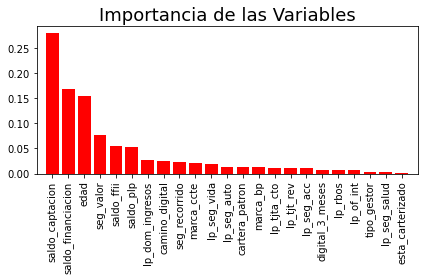

In [72]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
caracteristicas = df.columns[:-1]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importancia = forest.feature_importances_
indices = np.argsort(importancia)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            caracteristicas[indices[f]], 
                            importancia[indices[f]]))

plt.title('Importancia de las Variables',fontsize = 18)
plt.bar(range(X_train.shape[1]), 
        importancia[indices],
        align='center',color = 'r')

plt.xticks(range(X_train.shape[1]), 
           caracteristicas[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA-Importancia de las Variables', dpi=100,bbox_inches='tight')
plt.tight_layout()

plt.show()

####  Correlaciones entre Variables (con variables de segmento)

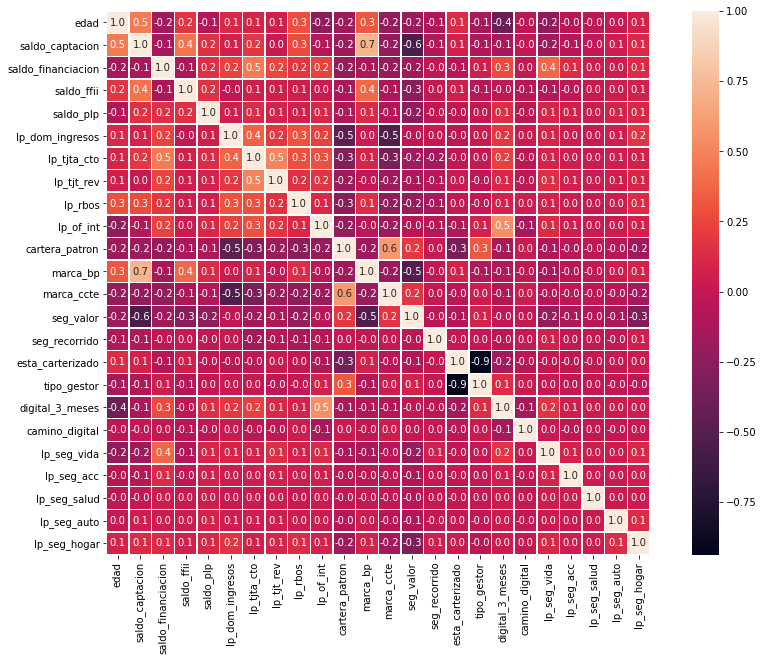

In [73]:
import seaborn as sns
correlation_mat = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=.5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/EDA- Correlationes Todas', dpi=75,bbox_inches='tight')
plt.show()


__Conclusiones.__

- Utilizamos tabla de correlaciones con metodo spearman cuyo resultado arroja mayores correlaciones que los otros metodos
- La correlacion entre las variables es en general baja. Hay incluso correlaciones negativas pero tambien bajas
- Variables de Unidad de negocio no se han utilizado.
- Variables que eliminamos del modelo por baja importancia.
    - 18) digital_3_meses         0.007651
    - 19) lp_rbos                 0.007175
    - 20) lp_of_int                      0.006659
    - 21) tipo_gestor                    0.003427
    - 22) lp_seg_salud                   0.003167
    - 23) esta_carterizado               0.001778
- Variables que eliminamos del modelo por correlacion alta con otras variables.
    - 13) cartera_patron                 0.012169  Correlacion con 10) marca_ccte                     0.021080

_ _ _

#### __Conclusiones Finales EDA__ .Variables a mantener y datos a modificar.

- __Bloque 1 - Variables unidades de negocio.__ Nuestro objetivo es determinar con los productos que tienen los clientes si son susceptibles de tener o no tener un seguro de hogar. Las Unidades de Negocio no han de influir en el modelo. Las elimino por lo tanto del modelo. 
         
- __Bloque 2 - Variables Edad.__ 
     Elimino del modelo a los clientes de 0 a 25 años y de mas de 90 años. 
    
- __Bloque 3 - Variables de Ahorro - Financiación__. Fondos de inversion y Planes de pension son covertidas a booleano. 

- __Bloque 4 - Variables de Servicios__.Eliminamos Seguro Saluc, Seguro Accidentes y lp Internet.

- __Bloque 5 - Variables de Seguros__. Todos los seguros seran utilizados dentro del modelo.

- __Bloque 6 - Variables de Segmentacion__. Cartera Patron, Clientescarterizados y BBP son eliminados del modelo. 
- __Bloque 7 - Variables digitales .__ Se mantiene camino digital.

30 variables originales. 17 se mantienen incluida target.

- 1) saldo_captacion                0.279079
- 2) saldo_financiacion             0.169123
- 3) edad                           0.154577
- 4) seg_valor                      0.076552
- 5) saldo_ffii                     0.054786
- 6) saldo_plp                      0.053133
- 7) lp_dom_ingresos                0.026537
- 8) camino_digital                 0.024198
- 9) seg_recorrido                  0.022719
- 10) marca_ccte                     0.021080
- 11) lp_seg_vida                    0.018652
- 12) lp_seg_auto                    0.013138
- 14) marca_bp                       0.012156
- 15) lp_tjta_cto                    0.011191
- 16) lp_tjt_rev                     0.010838
- 17) lp_seg_acc                     0.01021


## __4.9 Preprocesado__

<p style='text-align: justify;'>Recordamos que la preparación de los datos y el preprocesado de la base de datos comenzó inicialmente en el punto 4.6 Unión de archivos y Preparación de los Datos, justo después de haber construido y unido todos los datos en un solo archivo.  En esa ocasión vimos y analizamos los Nans y les dimos valores acordes a las categorías de cada variable.
<p style='text-align: justify;'>A lo largo del estudio EDA realizado, se han llegado a una serie de conclusiones las cuales vamos a poner en práctica en este capítulo.  Realizaremos por lo tantos aquellas modificaciones necesarias para dejar limpio y preparado nuestra base de datos para la construcción del modelo.
    
<p style='text-align: justify;'>1º Eliminamos 2 variables categóricas de segmentación.   Está carterizado y cliente BBP.
<p style='text-align: justify;'>2º Estudio de Outliers .  La única variable que puede tener Ouliers es la variable Edad. Al eliminar a los clientes entre los rangos de edad 0-25 y 90 según hemos concluido en el Eda confirmamos mediante grafica boxplot que finalmente la variable edad no contiene outliers.


<p style='text-align: justify;'>3º Fondos de Inversión y Planes de Pensión son convertidas en variables booleanas. (0-1) Tiene o no tiene.  
<p style='text-align: justify;'>4º Variable Captación:  Damos valor cero a todos aquellos valores negativos

<p style='text-align: justify;'>5º Label Encoder -   Dentro de nuestras variables de segmentación que definen una condición especifica de cada uno de los clientes,  encontramos finalmente cinco variables categóricas que queremos utilizar y que necesitamos convertir en número. 


<p style='text-align: justify;'>Sustituimos así cada uno de los posibles valores de definición por un número .  Conseguimos mediante este método poder utilizar en nuestro modelo y en un mismo espacio todas las variables numéricas y categóricas.  


<p style='text-align: justify;'>6º Normalización - Poco a poco vamos evolucionando nuestra base de datos.  
<p style='text-align: justify;'>De las 17 variables definitivas que hemos dejado para el estudio del modelo, encontramos dos de ellas “Saldo Captación” y “Saldo financiación” con valores reales establecidos en Euros.  Valores especificados en miles, cientos e incluso millones de euros.  
<p style='text-align: justify;'>También tenemos la variable edad que debemos trabajar. Necesitamos convertir todas las variables a una misma escala común que no haga distorsionar o dar mayor importancia a unas variables numéricas de otras.  Utilizamos el método de Normalización MinMaxEscaler y lo que conseguimos es traducir todas las variables a un rango entre 0 y 1 

<p style='text-align: justify;'>7º PCA Posible simplificación de variables reduciendo dimensionalidad a la base de datos.
Después de haber reducido el Data Frame eliminando unidades de negocio y otras variables según estudio EDA, nos hemos quedado únicamente 17 variables.  
<p style='text-align: justify;'>No consideramos necesario utilizar reducción de dimensionalidad PCA y lo confirmamos con la siguiente grafica en la que vemos como después del estudio de PCA a partir de 13 – 14 variables explicarían el 99 % de los 17 originales.  Por lo tanto, utilizar PCA no implicaría una mejora sustancial del resultado.





In [86]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Memory/df_cleanned.csv')

#### Label Encoder

Basandonos en EDA realizado ,dentro de variables de segmentacion mantenemos solo 5 las cuales tenemos que transformar a numero para poder utilizarlas en el modelo.

In [87]:
variables_segmentacion =['seg_valor','camino_digital','seg_recorrido','marca_ccte','marca_bp']

In [88]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [89]:
for segmento in variables_segmentacion:
    df[segmento]=lbl.fit_transform(df[segmento])

In [90]:
# Confirmamos que la transformacion se ha realizado correctamente.  
df['lp_seg_acc'].value_counts()

0    442348
1      9026
Name: lp_seg_acc, dtype: int64

In [91]:
df['lp_seg_acc'].unique()

array([0, 1], dtype=int64)

#### Adaptacion de Variables

In [92]:
# Eliminamos clientes de 0 a 24 años y de mas de 90 años
inf25 = df[df['edad'] < 25].index
# Eliminamos las filas de la base de datos
df.drop(inf25 , inplace=True)

In [93]:
# Eliminamos clientes de mas de 90 años
sup90 = df[df['edad'] > 90].index
# Eliminamos las filas de la base de datos
df.drop(sup90 , inplace=True)

In [94]:
df['edad'].describe()

count    417812.000000
mean         59.915787
std          16.207368
min          25.000000
25%          48.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: edad, dtype: float64

#### Estudio Outliers Edad

Hemos visto durante la exploracion del data set que existen distintas variables que son susceptibles de tener Outliers. Estas son 'edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'. 

- Variable Captacion. Son valores reales. No queremos eliminar outliers. Solamente modificamos los negativos y les damos valor 0 Euros.
- Fondos de inversion y planes de pension. Transformaremos a valor booleano 0-1 "Tiene no Tiene.
- Financiacion es una variable que por su naturaleza no queremos modificar.

- __Variable edad__. Es la unica que puede tener ouliers reales.  Hemos eliminado previamente clientes entre 0-25 años y superiores a 90 años por lo que probablemente los Outlier esten ya trabajados. 

__Variable EDAD__

Hacemos la visualizacion con un histograma y un BoxPlot. Con este ultimo confirmamos que no tenemos Outliers

<AxesSubplot:>

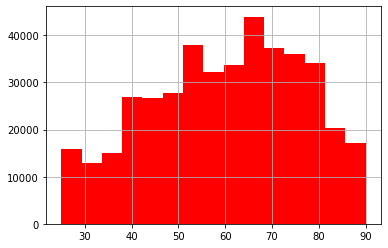

In [95]:
df['edad'].hist(color = 'r', bins = 15)

Boxplot edad


<function matplotlib.pyplot.show(close=None, block=None)>

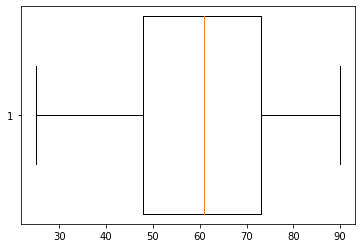

In [96]:
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   


In [97]:
# Transformamos variable Planes de Pension 0 No tiene 1 Si tiene
df['saldo_plp'] = df['saldo_plp'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_plp'], normalize = True)

0    0.888785
1    0.111215
Name: saldo_plp, dtype: float64

In [98]:
# Transformamos variable Fondos de Inversion 0 No tiene 1 Si tiene
df['saldo_ffii'] = df['saldo_ffii'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_ffii'], normalize = True)

0    0.859183
1    0.140817
Name: saldo_ffii, dtype: float64

In [99]:
# Variable Captacion. 
Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique()
Porcentaje_Clientes_con_saldos_negativos  = df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('Clientes_con_saldos_negativos :',Clientes_con_saldos_negativos)
print ('Porcentaje_Clientes_con_saldos_negativos: ',Porcentaje_Clientes_con_saldos_negativos)

Clientes_con_saldos_negativos : 8828
Porcentaje_Clientes_con_saldos_negativos:  0.021129120274190307


In [100]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [101]:
df['saldo_captacion'].describe()

count    4.178120e+05
mean     5.194882e+04
std      8.914284e+04
min      0.000000e+00
25%      2.189145e+03
50%      1.787874e+04
75%      6.811098e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [102]:
# Df sin unidades de negocio
df=df[['saldo_captacion','saldo_financiacion','edad','seg_valor','saldo_ffii', 'saldo_plp', 
      'lp_dom_ingresos','lp_rbos','camino_digital','seg_recorrido','marca_ccte','lp_seg_vida',
       'lp_seg_auto','marca_bp','lp_tjta_cto', 'lp_tjt_rev','lp_seg_acc','lp_seg_hogar']]

In [103]:
df.sample(5)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_rbos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
138904,78605.60,132.80,67.0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0
322974,263826.47,0.00,89.0,0,0,0,1,1,3,1,0,0,0,1,0,0,0,1
103589,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440684,2064.07,5340.03,79.0,2,0,0,1,1,4,0,0,0,0,0,1,1,0,0
149143,110750.88,0.00,58.0,0,0,0,1,1,4,1,0,0,0,1,0,0,0,0


In [104]:
# Guardamos cvs
df.to_csv('df_encoded.csv', index = False)

#### NORMALIZACION

Debemos llevar todas las varaibles a una escala comun. Para ello utilizamos MinMaxScaler.

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [108]:
df_normalized = scaler.fit_transform(df)

In [109]:
columnas = df.columns

In [110]:
df_normalized = pd.DataFrame(df_normalized, columns=columnas)

In [111]:
df_normalized.head(3)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_rbos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
0,0.251050,0.001689,0.766667,0.0,1.0,1.0,1.0,1.0,0.00,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.215915,0.001689,0.900000,0.0,1.0,0.0,0.0,1.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.215915,0.001689,0.833333,0.0,1.0,0.0,0.0,1.0,0.75,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Guardamos cvs
df_normalized.to_csv('df_normalized.csv', index = False)

#### PCA 

<p style='text-align: justify;'> No lo consideramos necesario. Despues de haber reducido el Data Frame quedandonos unicamente con las columnas necesarias para el estudio del modelo, aun asi tenemos 17 variables que vamos a intentar reducir utilizando PCA para reducir la dimensionalidad. Compararemos si la utilizacion del PCA mejora o no el resultado.

In [113]:
from sklearn.decomposition import PCA

In [114]:
df_sin_target = df_normalized.drop(['lp_seg_hogar'], axis = 1)

In [116]:
pca = PCA(15) # n =  ponemos como numero de pcas 15
pca.fit(df_sin_target) # obtener los componentes principales
df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [117]:
pca.components_[14]

array([ 1.11824554e-03,  2.01649349e-03, -5.95476203e-03,  2.09566153e-02,
       -8.35933148e-03, -2.44076842e-02, -1.33005712e-02, -2.62559100e-03,
        1.26372849e-03,  4.32207925e-03,  4.54410735e-06, -2.66986552e-03,
        9.98854731e-01,  4.21535182e-03,  2.38578504e-03, -1.08234884e-02,
       -2.81397054e-02])

In [118]:
list(zip(df_sin_target.columns, df_transforming[0]))

[('saldo_captacion', -1.0001994539457362),
 ('saldo_financiacion', 0.07868380926519651),
 ('edad', 0.3879969081171438),
 ('seg_valor', 0.4507084157425182),
 ('saldo_ffii', 0.35391518296195745),
 ('saldo_plp', 0.5558252379004145),
 ('lp_dom_ingresos', 0.9965997265712386),
 ('lp_rbos', -0.19332282166624523),
 ('camino_digital', -0.11666327447013039),
 ('seg_recorrido', -0.28133138819151104),
 ('marca_ccte', -0.09974425176644718),
 ('lp_seg_vida', -0.32760118612421),
 ('lp_seg_auto', 0.13144175975214176),
 ('marca_bp', -0.0790746208904541),
 ('lp_tjta_cto', -0.06355582872580078)]

In [119]:
print("shape X_pca", df_transforming.shape)
exp = pca.explained_variance_ratio_
print(exp)
print('sum:',sum(exp[0:15]))
#Vemos que con los 15 componentes tenemos el 99% de varianza explicada. Casi mismo numero de variables que sin PCA.

shape X_pca (417812, 15)
[0.23706238 0.17414257 0.10868627 0.07626315 0.06834774 0.05713
 0.05346763 0.04287605 0.041858   0.03833963 0.03725154 0.03119465
 0.01490429 0.01060127 0.00767722]
sum: 0.9998023778195608


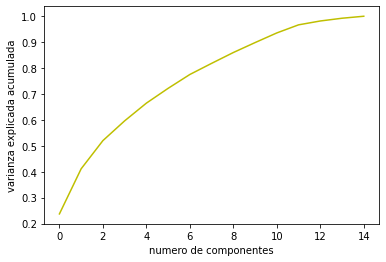

In [120]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'y')
plt.xlabel('numero de componentes')
plt.ylabel('varianza explicada acumulada')
plt.show() 

In [121]:
# Damos un nombre a cada columna del DF una vez realizado el PCA.
df_pca = pd.DataFrame (data = df_transforming, columns = ['var_pca_1','var_pca_2','var_pca_3',
                                                          'var_pca_4','var_pca_5','var_pca_6',
                                                          'var_pca_7','var_pca_8','var_pca_9',
                                                          'var_pca_10','var_pca_11','var_pca_12',
                                                          'var_pca_13','var_pca_14','var_pca_15'])                          
                                                          

In [122]:
# Unimos nuestro Target al DF con PCA realizado.
df_normalized_pca = pd.concat ([df_pca, df_normalized [['lp_seg_hogar']]], axis = 1)

In [123]:
df_normalized_pca.to_csv('df_normalized_pca.csv', index = False)

__Conclusiones Previas a la Construcción del Modelo.__

<p style='text-align: justify;'>Finalizamos con este capítulo la preparación, preprocesado de los datos para iniciar la construcción de nuestro modelo de clasificación.   A lo largo de este proceso hemos generado hasta 3 base de datos distintas. 

<p style='text-align: justify;'>•	Base de datos eliminando variables categóricas, cambiando a booleano variables de FFII y PP,   eliminando clientes de ciertos rangos de edad y adaptando las variables categóricas con Label Encoder.

<p style='text-align: justify;'>•	Base de datos anterior a la que se le une la normalización a través de minmaxscaler para que todas las variables estuviesen en una misma escala.

<p style='text-align: justify;'>•	Base de datos anterior implementando PCA reducción de dimensionalidad.

<p style='text-align: justify;'>Hemos modificado valores Nans, hemos eliminado outliers en aquella variable susceptible de tenerla,  se han adaptado variables de captación y financiación eliminando valores negativos,  se han adaptado variables de fondos de inversión y planes de pensión dándoles valores booleanos 0 – 1 y se han aplicado técnicas de reducción de dimensionalidad y de transformación de variables categóricas a numeral.

<p style='text-align: justify;'>Con toda esta cirugía aplicada a la base de datos construida inicialmente,  desarrollaremos el modelo de clasificación cuya finalidad recordamos es “Generar un modelo predictivo de clasificación que ayude a toda la fuerza comercial de las sucursales a orientar la comercialización, a optimizar los tiempos, metodologías y sistemas utilizados. Todo ello en busca de un mayor éxito de ventas , margen para la entidad financiera y satisfacción de los clientes”

<p style='text-align: justify;'>Todo el proceso de unión está ubicado en el notebook “preprocessing” al cual se puede acceder dentro de la carpeta Preprocessing del repositorio.

## __4.10 Construccion del  Modelo__

<p style='text-align: justify;'>Recordamos cual era nuestro Objetivo y Finalidad:
    
__<p style='text-align: justify;'>Objetivo__: Desarrollar un modelo predictivo de compra de productos financieros concretando en los Seguros del Hogar. 
__<p style='text-align: justify;'>Finalidad__: Generar un modelo predictivo que ayude a toda la fuerza comercial de las sucursales a orientar la comercialización, a optimizar los tiempos, metodologías y sistemas utilizados. Todo ello en busca de un mayor éxito de ventas y satisfacción de los clientes.
__<p style='text-align: justify;'>Elección del Modelo:__
<p style='text-align: justify;'>El modelo final de clasificación elegido ha sido RandomForest
<p style='text-align: justify;'>Buscamos una sistemática comercial que simplifique el estudio de los clientes antes de llamarles.  Buscamos una optimización del tiempo para llegar a cuantos mas clientes mejor. Nos interesa finalmente filtrar aquellos clientes a los que tenemos que llamar.  
<p style='text-align: justify;'>Este filtro se puede obtener desde dos perspectivas.  Y lo buscamos dentro de una matriz de confusión. Buscando verdaderos positivos para cargarlos en el objetivo de contactos diarios y que los comerciales puedan llamarles o identificando verdaderos negativos para desecharlos y finalmente coger los verdaderos positivos y llamarles.  En ambos casos llegamos a la misma conclusión y obtenemos lo que realmente queremos.  Llamar a los que nos interesan.
<p style='text-align: justify;'>Se han desarrollado 5 modelos distintos de clasificación con el fin de buscar aquel que mejor métricas y mejores comportamientos tenga según nuestras necesidades concretas. Las principales métricas que utilizaremos como evaluadores de nuestros modelos son Recall y Roc Auc.

__Modelos Machine Learning Entrenados.__

•	Modelo Clasificación Regresión Logística
    
•	Modelo Clasificación K-Nearest Neighbor 
    
•	Modelo Clasificación TREE
    
•	Modelo Clasificación Xgboost
    
•	Modelo Clasificación Randon Forest - MODELO FINAL ELEGIDO
    
Mostramos de inicio y a efectos comparativos una Tabla de métricas obtenidas de cada uno de los modelos entrenados.


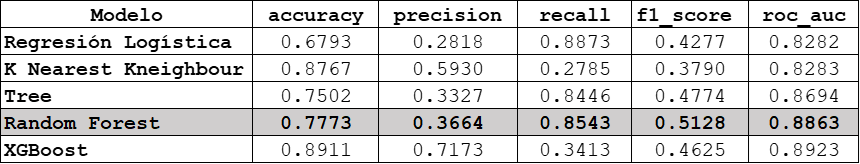

In [125]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RESUMEN_RESULTADOS_FINALES.png'), width = 700)

<p style='text-align: justify;'>El desarrollo y código de todos estos modelos se encuentran dentro de la carpeta “ Models“ de este repositorio.  
<p style='text-align: justify;'>Como hemos comentado al inicio, en esta memoria vamos a centrarnos en el Modelo Final Elegido RANDOMFOREST.  
<p style='text-align: justify;'>Mostraremos como iniciamos el modelo, nuestra primera aproximación,  como se ha evolucionado y desarrollado,  problemas encontrados y soluciones implementadas, evolución de métricas obtenidas y finalmente la conclusión y resultado final.
<p style='text-align: justify;'>El motivo de la utilización de este modelo es principalmente por su sencillez de explicación su sencillez de funcionamiento y la comparativa positiva en métricas con otros modelos.
<p style='text-align: justify;'>Se trata de un modelo fácil de interpretar muy útil para un modelo de clasificación,  reduce de por si la dimensionalidad de las variables .
    


__•	Primera Aproximación__
<p style='text-align: justify;'> Nuestro camino comienza con la base de datos limpia con un preprocesado único de modificación de Nans.  Se trata de la primera base de datos obtenida después de haberla unido en la primera fase de construcción.  Queríamos saber con los datos en crudo que comportamiento tenia el modelo y que métricas obteníamos sin hacer nada intermedio.
Los Resultados fueron los siguientes.  Claramente mejorables. 


In [127]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

<p style='text-align: justify;'>Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y nombre de las Columnas / variables que la componen. Las variables que se refieren a unidades de negocio no van a ser utilizadas en el modelo por lo que las transformamos a Objeto para una mejor comprensión y segmentación de las propias variables.

In [128]:
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Memory/df_cleanned.csv')

In [129]:
# Transformamos las variables de la unidad de negocio en objeto ya que no queremos utilizarlas.
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [130]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287,TUTELA,28332,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475,ASESORAMIENTO FINANCIERO,14204,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000,ASESORAMIENTO FINANCIERO,14219,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [131]:
df = df.select_dtypes('number')

In [132]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [133]:
# Instanciamos el clasificador
clfforest_first_aproach = RandomForestClassifier()

In [134]:
# Entrenamos el Modelo
clfforest_first_aproach.fit(X,y)

RandomForestClassifier()

In [135]:
# Predicciones
clfforest_first_aproach.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
# Dividimos el Data Frame en set de entrenamiento y Test.  80% Entrenamiento y 20% TEst
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [137]:
# Entrenamos
clfforest_first_aproach.fit(X_train,y_train)

RandomForestClassifier()

In [138]:
# Predicciones
clfforest_first_aproach.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [139]:
# Probabilidades de tener seguro de hogar
clfforest_first_aproach.predict_proba(X_test)[:, 1]

array([0.1 , 0.24, 0.65, ..., 0.07, 0.16, 0.2 ])

In [140]:
# Resultados obtenidos Primera Aproximación

accuracy_score_first_aproach = accuracy_score(y_test,clfforest_first_aproach.predict(X_test))
precision_first_aproach  = precision_score(y_test,clfforest_first_aproach.predict(X_test))
recall_first_aproach = recall_score(y_test,clfforest_first_aproach.predict(X_test))
f1_score_first_aproach = f1_score(y_test,clfforest_first_aproach.predict(X_test))
roc_auc_score_first_aproach = roc_auc_score(y_test,clfforest_first_aproach.predict_proba(X_test)[:, 1])

print('== Primera Aproximacion RandomForest ==')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_first_aproach)
print('------------------------------------')
print('precision  =',precision_first_aproach)
print('------------------------------------')
print('recall =', recall_first_aproach)
print('------------------------------------')
print('f1_score =', f1_score_first_aproach)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_first_aproach)

== Primera Aproximacion RandomForest ==
------------------------------------
accuracy_score = 0.856748823040709
------------------------------------
precision  = 0.41148325358851673
------------------------------------
recall = 0.22621977089520576
------------------------------------
f1_score = 0.29194042925974595
------------------------------------
roc_auc_score = 0.7831459425636401


Sin Entrenar: ROC AUC=0.500
Tree: ROC AUC=0.783


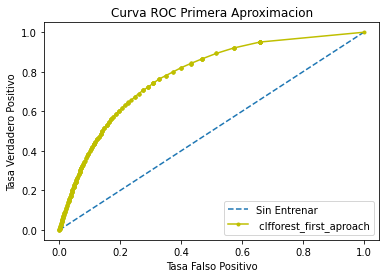

In [141]:
# Ploteamos la Curva ROC
# Generamos un Clasificador sin entrenar
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# Calculamos la Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest_first_aproach.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest_first_aproach' , color = "y")
# Etiquetas
pyplot.title('Curva ROC Primera Aproximacion')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

__• Construccion del Modelo__

<p style='text-align: justify;'>Comenzamos el estudio real del modelo.  Recordamos que durante el preprocesado de la base de datos,  se generaron hasta 3 bases de datos distintas.
<p style='text-align: justify;'>1.	Base de datos eliminando variables categóricas, cambiando a booleano variables de FFII y PP,   eliminando clientes de ciertos rangos de edad y adaptando las variables categóricas con Label Encoder. 
<p style='text-align: justify;'>2.	Base de datos anterior a la que se le une la normalización a través de minmaxscaler para que todas las variables estuviesen en una misma escala.
<p style='text-align: justify;'>3.	Base de datos anterior implementando PCA reducción de dimensionalidad.
<p style='text-align: justify;'>El modelo ha sido entrenado con las dos primeras bases de datos.  La tercera base con PCA implementada no la vimos necesaria dado que lo único que hacíamos era reducir dos variables.  
<p style='text-align: justify;'>El entrenamiento y resultado de las dos primeras bases de datos ha sido casi idéntico. Observamos que el hecho de haber normalizado los datos no ha sido un mejor condicionante para obtener mejores resultados.  La explicación de esto es que en un modelo de RandomForest, la normalización no tiene por qué ser necesaria ya que no se comparan magnitudes. Se trata de dividir rangos y no de compararlos. 
<p style='text-align: justify;'>Por otro lado,  durante el preprocesado hemos visto como la importancia de las variables no difería mucho.  Estos motivos han hecho que en el estudio final no se haya utilizado la base de datos normalizada.
<p style='text-align: justify;'>La primera decisión que tomamos en esta primera evolución del modelo es utilizar un estimador que intente poner remedio al gran desbalanceo de nuestro target.  Utilizamos el estimador de “ Class Weigth = Balanced”  . 
<p style='text-align: justify;'>Las métricas obtenidas solo con este ajuste mejoran algo nuestra primera aproximación, pero en ningún caso lo suficiente.


In [143]:
df_encoded = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Memory/df_encoded.csv')

In [144]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417812 entries, 0 to 417811
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   saldo_captacion     417812 non-null  float64
 1   saldo_financiacion  417812 non-null  float64
 2   edad                417812 non-null  float64
 3   seg_valor           417812 non-null  int64  
 4   saldo_ffii          417812 non-null  int64  
 5   saldo_plp           417812 non-null  int64  
 6   lp_dom_ingresos     417812 non-null  int64  
 7   lp_rbos             417812 non-null  int64  
 8   camino_digital      417812 non-null  int64  
 9   seg_recorrido       417812 non-null  int64  
 10  marca_ccte          417812 non-null  int64  
 11  lp_seg_vida         417812 non-null  int64  
 12  lp_seg_auto         417812 non-null  int64  
 13  marca_bp            417812 non-null  int64  
 14  lp_tjta_cto         417812 non-null  int64  
 15  lp_tjt_rev          417812 non-nul

In [145]:
df_encoded.columns

Index(['saldo_captacion', 'saldo_financiacion', 'edad', 'seg_valor',
       'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos', 'lp_rbos',
       'camino_digital', 'seg_recorrido', 'marca_ccte', 'lp_seg_vida',
       'lp_seg_auto', 'marca_bp', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_seg_acc',
       'lp_seg_hogar'],
      dtype='object')

In [146]:
df_encoded.sample(5)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_rbos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
236177,67931.09,143.25,57.0,0,1,0,1,1,3,0,0,0,0,1,1,0,0,0
384683,72648.06,133.65,74.0,0,0,0,1,1,3,0,0,0,0,1,1,1,0,0
185638,26804.89,61.72,73.0,2,0,0,1,1,3,2,0,0,0,0,1,0,0,0
365392,1644.10,44011.14,48.0,0,0,0,1,1,4,2,0,0,0,0,1,0,0,1
271684,342.81,25538.43,45.0,2,0,0,1,1,4,2,0,0,0,0,1,0,0,0


In [147]:
# Inputs y Target 
X = df_encoded.drop(['lp_seg_hogar'], axis = 1)
y= df_encoded['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 7102804 (417812, 17)
Datos y = 417812 (417812,)


In [148]:
# Dividimos el DF en set de entrenamiento y Test (80% train - 20% test)
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [149]:
# Shapes Train
X_train.shape, y_train.shape

((334249, 17), (334249,))

In [150]:
# Shapes Test
X_test.shape,y_test.shape

((83563, 17), (83563,))

In [151]:
# Instanciamos el Clasificador. Incorporamos un primer estimador para balancear el data set.
clfforest = RandomForestClassifier(class_weight = 'balanced')

In [152]:
# Entrenamos
clfforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [153]:
# Predicciones
clfforest.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
# Probabilidades de tener seguro de hogar
clfforest.predict_proba(X_test)[:, 1]

array([0.05      , 0.1       , 0.        , ..., 0.01      , 0.00808288,
       0.02      ])

In [155]:
# Todas las probabilidades
clfforest.predict_proba(X_test)

array([[0.95      , 0.05      ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       ...,
       [0.99      , 0.01      ],
       [0.99191712, 0.00808288],
       [0.98      , 0.02      ]])

__Primeros resultados__. Los resultados obtenidos en el entrenamiento y test utilizando la métrica Recall como medida muestran que el modelo no está generalizando bien. Hay una situación grave de sobreajuste que debo resolver. Lo confirmaremos mediante la Validación Cruzada. 

In [156]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfforest.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfforest.predict(X_test)))

===========RECALL TRAIN============
recall = 0.9997151371724078
===========RECALL TEST=============
recall = 0.38014654570830425


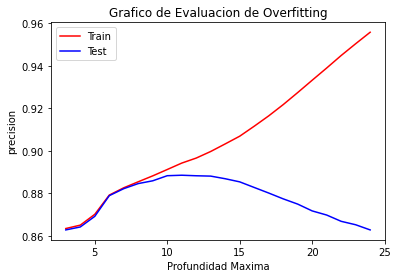

In [157]:
# Grafico de Evaluacion de Overfitting
# Se confirma con esta visualizacion que a partir de 8 profundidades el modelo empieza a generar overfitting
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 25))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='gini', max_depth=deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Ploteamos.
plt.plot(max_deep_list, train_prec, color='r', label='Train')
plt.plot(max_deep_list, eval_prec, color='b', label='Test')
plt.title('Grafico de Evaluacion de Overfitting')
plt.legend()
plt.ylabel('precision')
plt.xlabel('Profundidad Maxima')
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST Model - Evaluacion de Overfitting.png', dpi=75,bbox_inches='tight')

### Técnicas de validación cruzada.  Métricas: Validación cruzada
Utilizamos la validación cruzada iterando 5 veces a lo largo del conjunto de entrenamiento.

- Apartamos 1/5 muestras.
- Entrenamos el modelo con las 4/5 muestras restantes.
- Mediremos con diferentes métricas el resultado obtenido en las muestras apartadas.
- Esto significa que hacemos 5 entrenamientos independientes.
- El resultado será la media de las 5 métricas anteriores.

In [159]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfforest,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfforest,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfforest,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.6030521203685473, 0.3772504378283713, 0.4646562150887396)

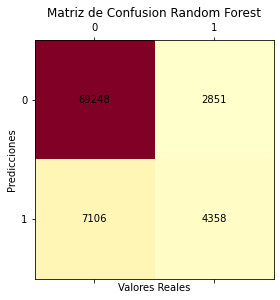

In [160]:
# Plot Matriz de Confusion 
# Plot Matriz de Confusion 
matriz_confusion_clfforest = confusion_matrix(y_test,clfforest.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfforest, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfforest.shape[0]):
    for j in range(matriz_confusion_clfforest.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfforest[i, j], va='center', ha='center')

plt.title('Matriz de Confusion Random Forest')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST Model - Confusion_Matrix_Random Forest.png', dpi=75,bbox_inches='tight')
plt.show()

In [161]:
# Resultados

accuracy_score_clfforest = accuracy_score(y_test,clfforest.predict(X_test))
precision_clfforest  = precision_score(y_test,clfforest.predict(X_test))
recall_clfforest = recall_score(y_test,clfforest.predict(X_test))
f1_score_clfforest = f1_score(y_test,clfforest.predict(X_test))
roc_auc_score_clfforest = roc_auc_score(y_test,clfforest.predict_proba(X_test)[:, 1])

print('==== Random Forest RESULTADOS ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_clfforest )
print('------------------------------------')
print('precision  =',precision_clfforest)
print('------------------------------------')
print('recall =', recall_clfforest)
print('------------------------------------')
print('f1_score =', f1_score_clfforest)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_clfforest)

==== Random Forest RESULTADOS ====
------------------------------------
accuracy_score = 0.8808443928532963
------------------------------------
precision  = 0.604522125121376
------------------------------------
recall = 0.38014654570830425
------------------------------------
f1_score = 0.4667702029668505
------------------------------------
roc_auc_score = 0.8653252327837934


Sin Entrenar : ROC AUC=0.500
Random Forest: ROC AUC=0.865


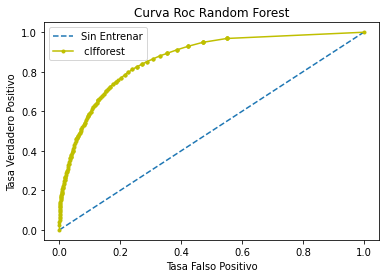

In [162]:
# Ploteamos la Curva ROC
# Generamos un Clasificador sin entrenar
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# Calculamos la Curva Roc
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest' , color = "y")
# Etiquetas
pyplot.title('Curva Roc Random Forest')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST- Roc Curve.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

<p style='text-align: justify;'>Podemos decir que este intento de mejora del modelo no es satisfactorio.  Hemos confirmado que no se ha generalizado bien, que existe overfitting,  que el desbalanceo del target no lo soluciona del todo  y  que las métricas requeridas no son acorde a nuestra necesidad.   Conclusión.  Hay que seguir evolucionado para mejorarlo. 


<p style='text-align: justify;'>Para ello utilizaremos Gridsearch que “permite evaluar y seleccionar de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada”


### GridSearchCV  

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
# Sugerimos la busqueda de los mejores parametros

forest_grid_params = {
    'n_estimators' : [100,125],
    'max_features' : ["auto", "log2"],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4],
    'min_samples_leaf' : [15,20]
    }

forestgs = GridSearchCV(
        clfforest,
        forest_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [165]:
forestgs.fit(X_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 28.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [15, 20],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 125]},
             verbose=1)

In [166]:
# Mejores Estimadores
forestgs.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_leaf=15,
                       min_samples_split=4, n_estimators=125)

In [167]:
# Mejores Parametros
forestgs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 15,
 'min_samples_split': 4,
 'n_estimators': 125}

__•	 Adaptación del Modelo con mejores parámetros recomendados:__

Implementamos los mejores parámetros recomendados.  
La primera mejora obtenida es que hemos conseguido solucionar el overfitting igualando las métricas de Train y Test a 0.85 Mediante Cross Validation se confirma.  Primer problema solucionado. 


In [168]:
clfforest_gs = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',
                                  max_depth = 10, max_features = 'auto', min_samples_split = 2,
                                  n_estimators = 100, min_samples_leaf = 15 )

In [169]:
clfforest_gs.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=15)

In [170]:
clfforest_gs.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
clfforest_gs.predict_proba(X_test)[:, 1]

array([0.57844418, 0.5567448 , 0.05511212, ..., 0.0763781 , 0.04059011,
       0.18785534])

__Evaluación del overfitting__ Los resultados obtenidos del entrenamiento y test usando la métrica recall como medida muestran que el overfitting ha sido resuelto usando mejores parámetros. Confirmado por la Validación Cruzada.

In [172]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfforest_gs.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfforest_gs.predict(X_test)))

===========RECALL TRAIN============
recall = 0.8670128845648173
===========RECALL TEST=============
recall = 0.8586008374040475


In [173]:
## Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfforest_gs,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfforest_gs,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfforest_gs,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.35926184603752986, 0.8618563922942206, 0.5086295794643487)

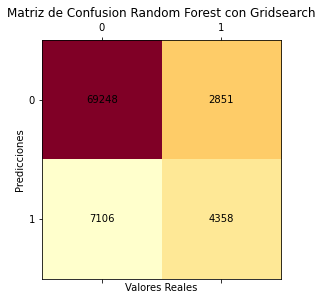

In [174]:
### Matriz de Confusion
matriz_confusion_clfforest_gs = confusion_matrix(y_test,clfforest_gs.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfforest_gs, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfforest_gs.shape[0]):
    for j in range(matriz_confusion_clfforest_gs.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfforest[i, j], va='center', ha='center')

plt.title('Matriz de Confusion Random Forest con Gridsearch')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST Model - Confusion_Matrix_Gridsearch.png', dpi=75,bbox_inches='tight')
plt.show()

In [175]:
# Resultados

accuracy_score_clfforest_gs = accuracy_score(y_test,clfforest_gs.predict(X_test))
precision_clfforest_gs  = precision_score(y_test,clfforest_gs.predict(X_test))
recall_clfforest_gs = recall_score(y_test,clfforest_gs.predict(X_test))
f1_score_clfforest_gs = f1_score(y_test,clfforest_gs.predict(X_test))
roc_auc_score_clfforest_gs = roc_auc_score(y_test,clfforest_gs.predict_proba(X_test)[:, 1])

print('==== Random Forest RESULTADOS FINALES ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_clfforest_gs )
print('------------------------------------')
print('precision  =',precision_clfforest_gs)
print('------------------------------------')
print('recall =', recall_clfforest_gs)
print('------------------------------------')
print('f1_score =', f1_score_clfforest_gs)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_clfforest_gs)

==== Random Forest RESULTADOS FINALES ====
------------------------------------
accuracy_score = 0.7750200447566507
------------------------------------
precision  = 0.36425875212789577
------------------------------------
recall = 0.8586008374040475
------------------------------------
f1_score = 0.5115106792080236
------------------------------------
roc_auc_score = 0.8866229424771226


Sin Entrenar : ROC AUC=0.500
Random Forest: ROC AUC=0.887


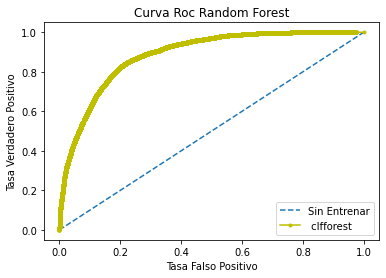

In [176]:
# Ploteamos la Curva ROC
# Generamos un Clasificador sin entrenar
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest_gs.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# Calculamos la Curva Roc
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest_gs.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest' , color = "y")
# Etiquetas
pyplot.title('Curva Roc Random Forest')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST- Roc Curve GridSearch.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Evolucion de Resultados

In [177]:
print('Resultados 1ª Aproximacion: RECALL %f, AUC %f' %(recall_first_aproach, roc_auc_score_first_aproach))
print('Resultados model: RECALL %f, AUC %f' %(recall_clfforest, roc_auc_score_clfforest))
print('Resultados model con gridsearch: RECALL %f, AUC %f' %(recall_clfforest_gs, roc_auc_score_clfforest_gs))

Resultados 1ª Aproximacion: RECALL 0.226220, AUC 0.783146
Resultados model: RECALL 0.380147, AUC 0.865325
Resultados model con gridsearch: RECALL 0.858601, AUC 0.886623


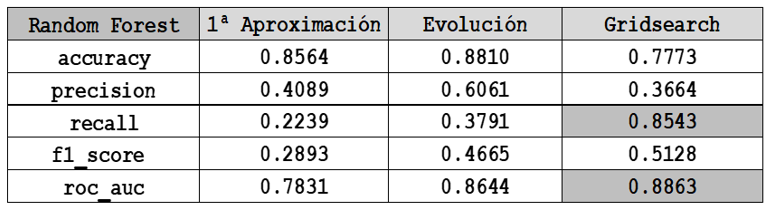

In [182]:
Image(filename=(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RESULTADO_RANDOM_FOREST_EVOLUCION.png'),width = 600)

In [178]:
# Guardamos modelo para futuro Frontend con streamlit
import pickle 
pickle_out = open(ruta + '/Financial-Product-Sales-Forecast-Model/Frontend/clfforest_gs.pkl', mode = "wb") 
pickle.dump(clfforest_gs, pickle_out) 
pickle_out.close()

- - -
- - -

 ## __5 *** Conclusiones ***__

- <p style='text-align: justify;'>Las métricas elegidas para evaluar nuestro modelo de clasificación Random Forest son Recall y AUC - Roc Curve.__. 
- <p style='text-align: justify;'>Comenzamos nuestro modelo con una primera aproximación obteniendo resultados muy mejorables. Recall 0.22 .La base de datos utilizada es la original sin ningún tipo de preprocesamiento. 
- <p style='text-align: justify;'>Evolucionamos nuestro modelo. Utilizamos como base de datos df_encoded. (Adaptado y aplicado Label Encoder). Dada la naturaleza del modelo no era necesario aplicar tambien la normalizacion. 
- <p style='text-align: justify;'>Dado que nuestro Objetivo está muy desequilibrado en una proporción de 87% de No y 13% de Sí, se ha utilizado el parámetro 'class_weight = 'balanced' en la configuración del modelo.
- <p style='text-align: justify;'>Obtenemos nuestra primera métrica relacionada con la posibilidad de sobreajuste. 
- <p style='text-align: justify;'>En un primer momento vemos cómo nuestro conjunto de entrenamiento no ha generalizado bien. Hay una gran diferencia entre los resultados obtenidos en Test y Train. 99 de entrenamiento - 37 de prueba. Podemos en este caso confirmar la existencia de overfitting.  Todo esto lo podemos ver en una gráfica de ajuste del entrenamiento donde podemos ver que después de 8 nodos Train y Test empiezan a separarse - Probamos por Validación Cruzada obteniendo medias de diferentes métricas. Las métricas resultantes de esta primera evolución del modelo son 37% Recall y 86% Auc. 

- <p style='text-align: justify;'>Necesitamos mejorar el modelo y para ello utilizamos GridSearch para buscar soluciones y mejores parámetros. Una vez obtenido, volvemos a entrenar y obtenemos de nuevo las métricas Recall 92% Train - 91% Test para confirmar entre otras cosas que hemos conseguido solucionar el overfitting y que nuestro modelo ha conseguido generalizar bien. Confirmamos con la Validación Cruzada obteniendo las medias de las diferentes métricas con 5 validaciones.
 
- <p style='text-align: justify;'>Las métricas finalmente obtenidas "Recall" 0,85 y AUC 0,88 que consideramos adecuadas para la explicación de nuestro modelo. 
- <p style='text-align: justify;'>Matriz de Confusión. En la diagonal de aciertos tenemos 69274 y 4347. En nuestro modelo prima la detección de los clientes que sí quieren contratar el seguro.  Necesitamos obtener una buena tasa de verdaderos positivos. Recordemos que nuestras métricas objetivo son Recall y AUC. Si detectamos a los clientes que probablemente vayan a contratar un seguro de hogar, podremos trabajar de forma más directa. Todo ello con el objetivo de optimizar el tiempo y la eficiencia comercial. El resultado de Recall obtenido es óptimo, con un 85% y un 88% en AUC.
- <p style='text-align: justify;'>El modelo podria ser perfeccionado si se utilizasen variables adicionales. Nos faltan, entre otras muchas, variables y datos como los ingresos del cliente, los hijos, el tipo de trabajo, el salario real en euros obtenido, el lugar de residencia... etc. 


